#üíµ Proyecto Final: **Scoring Crediticio Inteligente : Prediccion de Riesgo de Default en Creditos**



**Autor:** Gianpierre Trujillo

**Curso:** Data Science II

---

# ***Abstract:***

- El presente proyecto tiene como objetivo analizar y modelar el riesgo de incumplimiento de cr√©dito de los clientes de la instituci√≥n financiera Home Credit, utilizando un conjunto de datos multi-fuente proveniente de solicitudes actuales y comportamientos crediticios hist√≥ricos. Este an√°lisis integra variables demogr√°ficas, socioecon√≥micas, historiales de pago e informaci√≥n de solicitudes anteriores y entidades externas, generando as√≠ una visi√≥n integral del perfil de riesgo del cliente.

- A trav√©s de un an√°lisis exploratorio de datos (EDA) exhaustivo, se identificar√°n patrones relevantes que expliquen la probabilidad de incumplimiento, como la relaci√≥n deuda/ingresos, pagos atrasados, rechazos previos o la estabilidad laboral. Se aplicar√°n visualizaciones estad√≠sticas y an√°lisis multivariados para profundizar en las relaciones entre variables y detectar posibles sesgos o inconsistencias.

 Finalmente, este an√°lisis permitir√° desarrollar un modelo predictivo de clasificaci√≥n, el cual podr√° ser aplicado por instituciones financieras para anticipar el riesgo de default, optimizar la gesti√≥n de portafolios crediticios y facilitar decisiones m√°s s√≥lidas en la evaluaci√≥n de nuevos clientes.


#***Motivacion:***

- En un entorno financiero cada vez m√°s competitivo y regulado, gestionar adecuadamente el riesgo crediticio es fundamental para preservar la salud financiera de las entidades prestamistas. El creciente volumen de datos, sumado a la complejidad de los perfiles de los clientes, exige soluciones anal√≠ticas avanzadas que permitan identificar con anticipaci√≥n situaciones de incumplimiento y mitigar p√©rdidas. Este proyecto responde a esa necesidad mediante la construcci√≥n de un an√°lisis integral basado en datos multi-fuente, aportando un enfoque s√≥lido y t√©cnico para optimizar los procesos de evaluaci√≥n crediticia y mejorar la rentabilidad del portafolio.

#***Audiencia:***

- Este an√°lisis est√° dirigido a responsables de gesti√≥n de riesgo, equipos de an√°lisis de cr√©dito, profesionales de inteligencia de negocios y data scientists del sector financiero. Asimismo, puede ser de alto valor para consultores especializados en optimizaci√≥n de portafolios crediticios, as√≠ como para decisores estrat√©gicos interesados en implementar modelos predictivos de default que fortalezcan las pol√≠ticas de concesi√≥n de cr√©dito.

#***Preguntas de investigaci√≥n:***

1. ¬øCu√°les son los factores socioecon√≥micos m√°s relevantes que influyen en el incumplimiento de pagos crediticios?

2. ¬øQu√© relaci√≥n existe entre el historial crediticio externo (bureau) y la probabilidad de default en nuevos cr√©ditos?

3. ¬øEn qu√© medida los rechazos previos de solicitudes afectan la probabilidad de impago actual?

4. ¬øC√≥mo impacta el ratio deuda/ingresos en la capacidad de pago de los clientes?

5. ¬øExisten patrones temporales o comportamientos repetitivos en pagos atrasados que ayuden a anticipar la morosidad?

#***Hip√≥tesis:***

- H0: Las variables demogr√°ficas, socioecon√≥micas, y el historial crediticio no presentan un efecto estad√≠sticamente significativo sobre la probabilidad de incumplimiento de cr√©dito en la cartera analizada.
- H1: La proporci√≥n de ingresos destinada al pago de deuda (debt-to-income ratio) tiene un efecto positivo significativo sobre la probabilidad de default, incrementando el riesgo a medida que se eleva dicho ratio.

- H2: Los clientes con antecedentes de pagos atrasados recurrentes en sus cr√©ditos previos presentan una probabilidad significativamente mayor de incumplimiento en nuevos pr√©stamos, incluso tras controlar otras variables socioecon√≥micas.

- H3: El n√∫mero de solicitudes de cr√©dito rechazadas en el pasado se asocia de forma directa con un mayor riesgo de default en solicitudes actuales, actuando como indicador de fragilidad crediticia.

- H4: La estabilidad laboral (definida por la duraci√≥n del empleo actual) funciona como un factor protector, reduciendo de forma significativa la probabilidad de impago.

- H5: Las variables relacionadas con el historial crediticio externo (por ejemplo, n√∫mero de pr√©stamos activos y comportamiento de pago reportado en bureau.csv) influyen significativamente en la clasificaci√≥n de riesgo crediticio del solicitante, mejorando la capacidad de predicci√≥n del modelo.

# ***1. Adquisici√≥n de Datos (Data Acquisition)***

In [1]:
#Instalamos la api de Kaggle
!pip install -q kaggle

In [2]:
#Importamos las librerias necesarias
import os
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import mannwhitneyu, chi2_contingency, pointbiserialr
from typing import Tuple, List, Dict

from sklearn.model_selection import StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from typing import Tuple, List, Dict

In [3]:
#Definimos el estilo de los gr√°ficos
sns.set(style="whitegrid")

In [4]:
#Importamos la API Key para Kaggle
from google.colab import userdata

os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')

In [5]:
#Directorios
COMP = "home-credit-default-risk"
DATA_DIR = "/content/home-credit-default-risk"

In [6]:
#Importamos los archivos y los descomprimimos
!kaggle competitions download -c {COMP} -p /content -q
!unzip -o /content/home-credit-default-risk.zip -d {DATA_DIR} > /dev/null

In [7]:
#Listamos los archivos descargados
download_dir = os.path.join(os.getcwd(), 'home-credit-default-risk')
for root, dirs, files in os.walk(download_dir):
    for file in files:
        print(os.path.join(root, file))

/content/home-credit-default-risk/previous_application.csv
/content/home-credit-default-risk/sample_submission.csv
/content/home-credit-default-risk/credit_card_balance.csv
/content/home-credit-default-risk/application_train.csv
/content/home-credit-default-risk/installments_payments.csv
/content/home-credit-default-risk/bureau.csv
/content/home-credit-default-risk/POS_CASH_balance.csv
/content/home-credit-default-risk/application_test.csv
/content/home-credit-default-risk/HomeCredit_columns_description.csv
/content/home-credit-default-risk/bureau_balance.csv


In [8]:
# Lectura de archivos principales
app_train = pd.read_csv(f"{DATA_DIR}/application_train.csv")
app_test  = pd.read_csv(f"{DATA_DIR}/application_test.csv")
bureau = pd.read_csv(f"{DATA_DIR}/bureau.csv")
bureau_balance = pd.read_csv(f"{DATA_DIR}/bureau_balance.csv")
previous_app = pd.read_csv(f"{DATA_DIR}/previous_application.csv")
pos_cash = pd.read_csv(f"{DATA_DIR}/POS_CASH_balance.csv")
credit_card = pd.read_csv(f"{DATA_DIR}/credit_card_balance.csv")
installments = pd.read_csv(f"{DATA_DIR}/installments_payments.csv")

# Verificamos tama√±o
for name, df in {
    "application_train": app_train, "application_test": app_test, "bureau": bureau,
    "bureau_balance": bureau_balance, "previous_application": previous_app,
    "POS_CASH_balance": pos_cash, "credit_card_balance": credit_card,
    "installments_payments": installments
}.items():
    print(f"{name:28s} -> {df.shape}")

application_train            -> (307511, 122)
application_test             -> (48744, 121)
bureau                       -> (1716428, 17)
bureau_balance               -> (27299925, 3)
previous_application         -> (1670214, 37)
POS_CASH_balance             -> (10001358, 8)
credit_card_balance          -> (3840312, 23)
installments_payments        -> (13605401, 8)


####***Diccionario:***

In [9]:
#Usamos el archivo Homecredit_columns_description como diccionario
diccionario = pd.read_csv(f"{DATA_DIR}/HomeCredit_columns_description.csv",
                          encoding='latin-1')
diccionario['Special'] = diccionario['Special'].fillna("")

for table_name, table_df in diccionario.groupby('Table'):
    print(f"Table: {table_name}")
    display(table_df[['Row', 'Description', 'Special']])

Table: POS_CASH_balance.csv


Row                                        Description  \
142            SK_ID_PREV   ID of previous credit in Home Credit related t...   
143             SK_ID_CURR                           ID of loan in our sample   
144         MONTHS_BALANCE  Month of balance relative to application date ...   
145         CNT_INSTALMENT     Term of previous credit (can change over time)   
146  CNT_INSTALMENT_FUTURE    Installments left to pay on the previous credit   
147   NAME_CONTRACT_STATUS                   Contract status during the month   
148                 SK_DPD  DPD (days past due) during the month of previo...   
149             SK_DPD_DEF  DPD during the month with tolerance (debts wit...   

                                   Special  
142                                         
143                                         
144  time only relative to the application  
145                                         
146                                         
147                                         
148                                         
149

Table: application_{train|test}.csv


Row  \
0                    SK_ID_CURR   
1                        TARGET   
2            NAME_CONTRACT_TYPE   
3                   CODE_GENDER   
4                  FLAG_OWN_CAR   
..                          ...   
117   AMT_REQ_CREDIT_BUREAU_DAY   
118  AMT_REQ_CREDIT_BUREAU_WEEK   
119   AMT_REQ_CREDIT_BUREAU_MON   
120   AMT_REQ_CREDIT_BUREAU_QRT   
121  AMT_REQ_CREDIT_BUREAU_YEAR   

                                           Description Special  
0                             ID of loan in our sample          
1    Target variable (1 - client with payment diffi...          
2          Identification if loan is cash or revolving          
3                                 Gender of the client          
4                        Flag if the client owns a car          
..                                                 ...     ...  
117  Number of enquiries to Credit Bureau about the...          
118  Number of enquiries to Credit Bureau about the...          
119  Number of enquiries to Credit Bureau about the...          
120  Number of enquiries to Credit Bureau about the...          
121  Number of enquiries to Credit Bureau about the...          

[122 rows x 3 columns]

Table: bureau.csv


Row  \
122              SK_ID_CURR   
123            SK_BUREAU_ID   
124           CREDIT_ACTIVE   
125         CREDIT_CURRENCY   
126             DAYS_CREDIT   
127      CREDIT_DAY_OVERDUE   
128     DAYS_CREDIT_ENDDATE   
129       DAYS_ENDDATE_FACT   
130  AMT_CREDIT_MAX_OVERDUE   
131      CNT_CREDIT_PROLONG   
132          AMT_CREDIT_SUM   
133     AMT_CREDIT_SUM_DEBT   
134    AMT_CREDIT_SUM_LIMIT   
135  AMT_CREDIT_SUM_OVERDUE   
136             CREDIT_TYPE   
137      DAYS_CREDIT_UPDATE   
138             AMT_ANNUITY   

                                           Description  \
122  ID of loan in our sample - one loan in our sam...   
123  Recoded ID of previous Credit Bureau credit re...   
124  Status of the Credit Bureau (CB) reported credits   
125       Recoded currency of the Credit Bureau credit   
126  How many days before current application did c...   
127  Number of days past due on CB credit at the ti...   
128  Remaining duration of CB credit (in days) at t...   
129  Days since CB credit ended at the time of appl...   
130  Maximal amount overdue on the Credit Bureau cr...   
131  How many times was the Credit Bureau credit pr...   
132  Current credit amount for the Credit Bureau cr...   
133               Current debt on Credit Bureau credit   
134  Current credit limit of credit card reported i...   
135     Current amount overdue on Credit Bureau credit   
136       Type of Credit Bureau credit (Car, cash,...)   
137  How many days before loan application did last...   
138                Annuity of the Credit Bureau credit   

                                   Special  
122                                 hashed  
123                                 hashed  
124                                         
125                                recoded  
126  time only relative to the application  
127                                         
128  time only relative to the application  
129  time only relative to the application  
130                                         
131                                         
132                                         
133                                         
134                                         
135                                         
136                                         
137  time only relative to the application  
138

Table: bureau_balance.csv


Row                                        Description  \
139    SK_BUREAU_ID  Recoded ID of Credit Bureau credit (unique cod...   
140  MONTHS_BALANCE  Month of balance relative to application date ...   
141          STATUS  Status of Credit Bureau loan during the month ...   

                                   Special  
139                                 hashed  
140  time only relative to the application  
141

Table: credit_card_balance.csv


Row  \
150                 SK_ID_PREV    
151                  SK_ID_CURR   
152              MONTHS_BALANCE   
153                 AMT_BALANCE   
154     AMT_CREDIT_LIMIT_ACTUAL   
155    AMT_DRAWINGS_ATM_CURRENT   
156        AMT_DRAWINGS_CURRENT   
157  AMT_DRAWINGS_OTHER_CURRENT   
158    AMT_DRAWINGS_POS_CURRENT   
159     AMT_INST_MIN_REGULARITY   
160         AMT_PAYMENT_CURRENT   
161   AMT_PAYMENT_TOTAL_CURRENT   
162    AMT_RECEIVABLE_PRINCIPAL   
163               AMT_RECIVABLE   
164        AMT_TOTAL_RECEIVABLE   
165    CNT_DRAWINGS_ATM_CURRENT   
166        CNT_DRAWINGS_CURRENT   
167  CNT_DRAWINGS_OTHER_CURRENT   
168    CNT_DRAWINGS_POS_CURRENT   
169   CNT_INSTALMENT_MATURE_CUM   
170        NAME_CONTRACT_STATUS   
171                      SK_DPD   
172                  SK_DPD_DEF   

                                           Description  \
150  ID of previous credit in Home credit related t...   
151                           ID of loan in our sample   
152  Month of balance relative to application date ...   
153        Balance during the month of previous credit   
154  Credit card limit during the month of the prev...   
155  Amount drawing at ATM during the month of the ...   
156  Amount drawing during the month of the previou...   
157  Amount of other drawings during the month of t...   
158  Amount drawing or buying goods during the mont...   
159  Minimal installment for this month of the prev...   
160  How much did the client pay during the month o...   
161  How much did the client pay during the month i...   
162  Amount receivable for principal on the previou...   
163           Amount receivable on the previous credit   
164     Total amount receivable on the previous credit   
165  Number of drawings at ATM during this month on...   
166  Number of drawings during this month on the pr...   
167  Number of other drawings during this month on ...   
168  Number of drawings for goods during this month...   
169  Number of paid installments on the previous cr...   
170  Contract status (active signed,...) on the pre...   
171  DPD (Days past due) during the month on the pr...   
172  DPD (Days past due) during the month with tole...   

                                   Special  
150                                 hashed  
151                                 hashed  
152  time only relative to the application  
153                                         
154                                         
155                                         
156                                         
157                                         
158                                         
159                                         
160                                         
161                                         
162                                         
163                                         
164                                         
165                                         
166                                         
167                                         
168                                         
169                                         
170                                         
171                                         
172

Table: installments_payments.csv


Row  \
211             SK_ID_PREV    
212              SK_ID_CURR   
213  NUM_INSTALMENT_VERSION   
214   NUM_INSTALMENT_NUMBER   
215         DAYS_INSTALMENT   
216      DAYS_ENTRY_PAYMENT   
217          AMT_INSTALMENT   
218             AMT_PAYMENT   

                                           Description  \
211  ID of previous credit in Home credit related t...   
212                           ID of loan in our sample   
213  Version of installment calendar (0 is for cred...   
214            On which installment we observe payment   
215  When the installment of previous credit was su...   
216  When was the installments of previous credit p...   
217  What was the prescribed installment amount of ...   
218  What the client actually paid on previous cred...   

                                   Special  
211                                 hashed  
212                                 hashed  
213                                         
214                                         
215  time only relative to the application  
216  time only relative to the application  
217                                         
218

Table: previous_application.csv


Row  \
173                  SK_ID_PREV    
174                   SK_ID_CURR   
175           NAME_CONTRACT_TYPE   
176                  AMT_ANNUITY   
177              AMT_APPLICATION   
178                   AMT_CREDIT   
179             AMT_DOWN_PAYMENT   
180              AMT_GOODS_PRICE   
181   WEEKDAY_APPR_PROCESS_START   
182      HOUR_APPR_PROCESS_START   
183  FLAG_LAST_APPL_PER_CONTRACT   
184       NFLAG_LAST_APPL_IN_DAY   
185             NFLAG_MICRO_CASH   
186            RATE_DOWN_PAYMENT   
187        RATE_INTEREST_PRIMARY   
188     RATE_INTEREST_PRIVILEGED   
189       NAME_CASH_LOAN_PURPOSE   
190         NAME_CONTRACT_STATUS   
191                DAYS_DECISION   
192            NAME_PAYMENT_TYPE   
193           CODE_REJECT_REASON   
194              NAME_TYPE_SUITE   
195             NAME_CLIENT_TYPE   
196          NAME_GOODS_CATEGORY   
197               NAME_PORTFOLIO   
198            NAME_PRODUCT_TYPE   
199                 CHANNEL_TYPE   
200             SELLERPLACE_AREA   
201         NAME_SELLER_INDUSTRY   
202                  CNT_PAYMENT   
203             NAME_YIELD_GROUP   
204          PRODUCT_COMBINATION   
205           DAYS_FIRST_DRAWING   
206               DAYS_FIRST_DUE   
207    DAYS_LAST_DUE_1ST_VERSION   
208                DAYS_LAST_DUE   
209             DAYS_TERMINATION   
210    NFLAG_INSURED_ON_APPROVAL   

                                           Description  \
173  ID of previous credit in Home credit related t...   
174                           ID of loan in our sample   
175  Contract product type (Cash loan, consumer loa...   
176                    Annuity of previous application   
177  For how much credit did client ask on the prev...   
178  Final credit amount on the previous applicatio...   
179           Down payment on the previous application   
180  Goods price of good that client asked for (if ...   
181  On which day of the week did the client apply ...   
182  Approximately at what day hour did the client ...   
183  Flag if it was last application for the previo...   
184  Flag if the application was the last applicati...   
185                            Flag Micro finance loan   
186    Down payment rate normalized on previous credit   
187        Interest rate normalized on previous credit   
188        Interest rate normalized on previous credit   
189                           Purpose of the cash loan   
190  Contract status (approved, cancelled, ...) of ...   
191  Relative to current application when was the d...   
192  Payment method that client chose to pay for th...   
193          Why was the previous application rejected   
194  Who accompanied client when applying for the p...   
195  Was the client old or new client when applying...   
196  What kind of goods did the client apply for in...   
197  Was the previous application for CASH, POS, CA...   
198      Was the previous application x-sell o walk-in   
199  Through which channel we acquired the client o...   
200  Selling area of seller place of the previous a...   
201                         The industry of the seller   
202  Term of previous credit at application of the ...   
203  Grouped interest rate into small medium and hi...   
204  Detailed product combination of the previous a...   
205  Relative to application date of current applic...   
206  Relative to application date of current applic...   
207  Relative to application date of current applic...   
208  Relative to application date of current applic...   
209  Relative to application date of current applic...   
210  Did the client requested insurance during the ...   

                                   Special  
173                                 hashed  
174                                 hashed  
175                                         
176                                         
177                                         
178                                         
179                                         
1

#***2. Tratamiento de Datos (Data Wrangling)***

### 2.1 Hacemos un an√°lisis inicial del dataset principal

####2.1.1 Analisis General

In [10]:
#Revisamos las primeras filas
app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [11]:
#Vemos un resumen general
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [12]:
#Vemos la distribuci√≥n de variables num√©ricas
app_train.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [13]:
#Revisamos si hay valores √∫nicos de variables categ√≥ricas
for col in app_train.columns:
    if app_train[col].dtype == 'object':
        print(f"{col}: {app_train[col].nunique()} categorias")

NAME_CONTRACT_TYPE: 2 categorias
CODE_GENDER: 3 categorias
FLAG_OWN_CAR: 2 categorias
FLAG_OWN_REALTY: 2 categorias
NAME_TYPE_SUITE: 7 categorias
NAME_INCOME_TYPE: 8 categorias
NAME_EDUCATION_TYPE: 5 categorias
NAME_FAMILY_STATUS: 6 categorias
NAME_HOUSING_TYPE: 6 categorias
OCCUPATION_TYPE: 18 categorias
WEEKDAY_APPR_PROCESS_START: 7 categorias
ORGANIZATION_TYPE: 58 categorias
FONDKAPREMONT_MODE: 4 categorias
HOUSETYPE_MODE: 3 categorias
WALLSMATERIAL_MODE: 7 categorias
EMERGENCYSTATE_MODE: 2 categorias


####2.1.2 Correlaciones entre variables

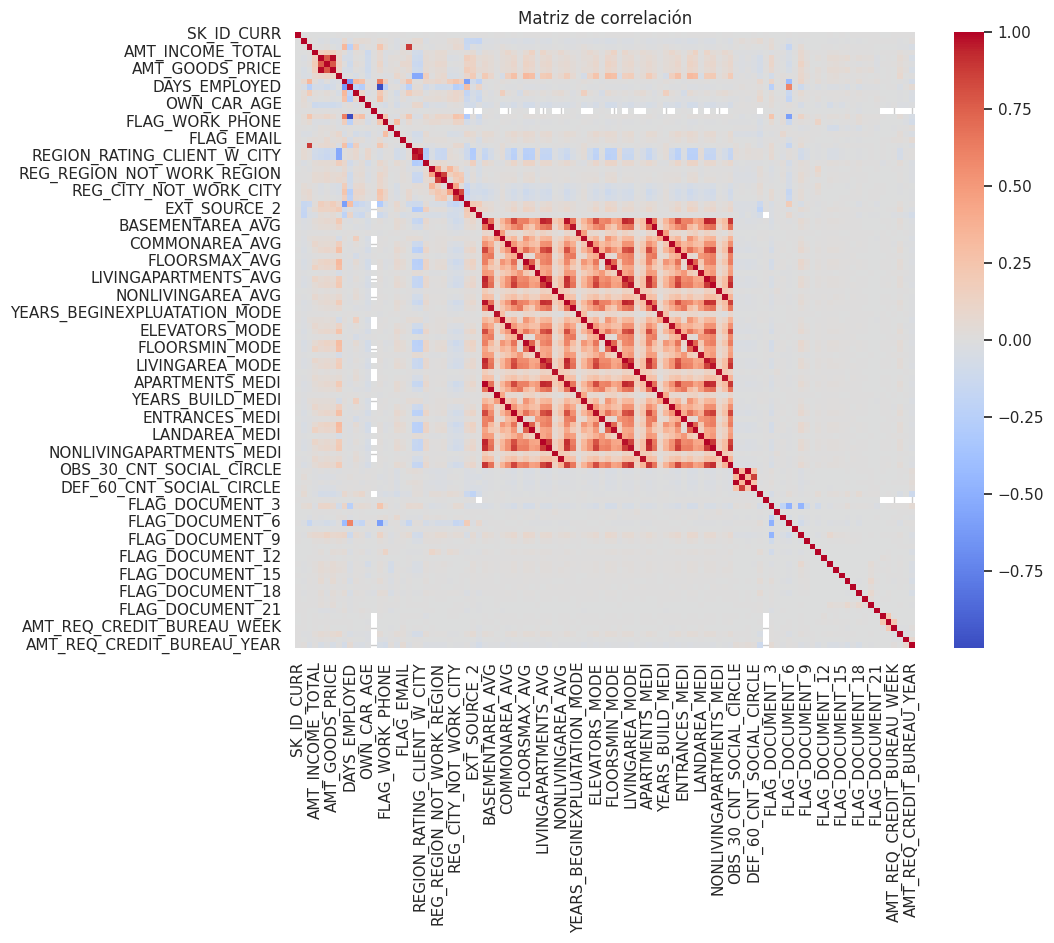

In [14]:
corr = app_train.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Matriz de correlaci√≥n')
plt.show()

####2.1.3 Valores nulos

In [15]:
#Revisi√≥n de valores nulos
missing_values = app_train.isnull().sum()
missing_percent = (missing_values / len(app_train)) * 100
missing_df = pd.DataFrame({'Nulos': missing_values, 'Porcentaje (%)': missing_percent}).sort_values(by='Porcentaje (%)', ascending=False)

In [16]:
#Listamos las columnas con valores nulos de mayor a menor a partir del 30%
print ("Variables con mas del 30% de nulos:")
print(missing_df[missing_df['Porcentaje (%)'] > 30])

Variables con mas del 30% de nulos:
                               Nulos  Porcentaje (%)
COMMONAREA_AVG                214865       69.872297
COMMONAREA_MODE               214865       69.872297
COMMONAREA_MEDI               214865       69.872297
NONLIVINGAPARTMENTS_MEDI      213514       69.432963
NONLIVINGAPARTMENTS_MODE      213514       69.432963
NONLIVINGAPARTMENTS_AVG       213514       69.432963
FONDKAPREMONT_MODE            210295       68.386172
LIVINGAPARTMENTS_AVG          210199       68.354953
LIVINGAPARTMENTS_MEDI         210199       68.354953
LIVINGAPARTMENTS_MODE         210199       68.354953
FLOORSMIN_MODE                208642       67.848630
FLOORSMIN_AVG                 208642       67.848630
FLOORSMIN_MEDI                208642       67.848630
YEARS_BUILD_AVG               204488       66.497784
YEARS_BUILD_MODE              204488       66.497784
YEARS_BUILD_MEDI              204488       66.497784
OWN_CAR_AGE                   202929       65.990810
LANDAREA_M

####2.1.4 Imputaciones

| Variable             | % Nulos | Acci√≥n tomada                           | Justificaci√≥n |
|----------------------|---------|-----------------------------------------|---------------|
| `OWN_CAR_AGE`        | ~65%    | Imputada condicionalmente               | Se conserva por relevancia. Si no tiene auto (`FLAG_OWN_CAR = N`), se asigna `0` (*no aplica*). Si tiene auto y falta, se imput√≥ la mediana entre due√±os. Adem√°s, se cre√≥ un flag `OWN_CAR_AGE__imputed_flag` para marcar imputaci√≥n. |
| `DAYS_EMPLOYED`      | ~5% (con sentinel `365243`) | Se reemplaz√≥ `365243` por `NaN` y luego se imput√≥ con mediana. | `365243` es un valor de *missing codificado*. Imputar con mediana conserva coherencia temporal y evita sesgos extremos. |
| Variables categ√≥ricas (ej. `OCCUPATION_TYPE`) | 30‚Äì40% | Imputadas con categor√≠a `"Missing"` | Evita eliminar columnas con potencial informativo y permite que el modelo detecte patrones asociados a la ausencia de datos. |
| Otras num√©ricas (>60% nulos, no protegidas) | >60% | Eliminadas | Por alta proporci√≥n de nulos, su aporte predictivo es bajo y el riesgo de ruido es alto. |
| Resto de num√©ricas con nulos moderados | <60% | Imputadas con mediana | La mediana es robusta a outliers y mantiene la distribuci√≥n central. |
| Resto de categ√≥ricas con nulos moderados | <60% | Imputadas con `"Missing"` | Consistente con estrategia global de categor√≠as. |

---

**Resumen**:  
- Se aplic√≥ una regla general de **drop si >60% de nulos**, salvo variables protegidas (`OWN_CAR_AGE`).  
- Se a√±adieron **flags de imputaci√≥n** para que el modelo pueda capturar el efecto de los datos faltantes.  
- La estrategia combina criterios t√©cnicos (porcentaje de nulos, tipo de variable) con criterios de negocio (relevancia de la variable en el riesgo crediticio).

#### Nota de justificaci√≥n: imputaci√≥n de `OWN_CAR_AGE`

- `OWN_CAR_AGE` tiene >60% de valores nulos. En lugar de eliminar la variable, se decidi√≥ **conservarla e imputarla condicionalmente** porque:
  - Es **relevante para el perfil crediticio**: la antig√ºedad del auto puede reflejar estabilidad econ√≥mica.
  - El valor ‚Äúfaltante‚Äù en muchos casos corresponde a clientes que **no poseen auto**. Para ellos se imput√≥ `0`, interpretado como *no aplica*.
  - En clientes con auto (`FLAG_OWN_CAR = Y`), cuando falta `OWN_CAR_AGE` se imput√≥ la **mediana entre due√±os**, lo que mantiene consistencia y evita sesgo extremo.
- Se agreg√≥ adem√°s un **flag de imputaci√≥n (`OWN_CAR_AGE__imputed_flag`)** para permitir que el modelo aprenda si la variable fue estimada o estaba disponible.

- Esta estrategia evita perder una variable potencialmente predictiva, mantiene coherencia de negocio y documenta el origen de los datos faltantes.


####2.1.5 Tratamos los nulos

In [17]:
#Modificamos app_train
df = app_train.copy()
if 'DAYS_EMPLOYED' in df.columns:
    df.loc[df['DAYS_EMPLOYED'] == 365243, 'DAYS_EMPLOYED'] = np.nan  # tratamos como missing

#Tabla de nulos y tipos (para documentar)
null_pct = df.isna().mean().sort_values(ascending=False).rename('missing_pct')
dtypes = df.dtypes.astype(str).rename('dtype')
plan_nulos = pd.concat([null_pct, dtypes], axis=1)
display(plan_nulos.head(20))

#Dropeamos si >60% nulos (salvo columnas protegidas)
protected_cols = {'OWN_CAR_AGE'}  # esta justificada su imputacion
to_drop = [c for c in plan_nulos.index if plan_nulos.loc[c, 'missing_pct'] > 0.60 and c not in protected_cols]
df.drop(columns=to_drop, inplace=True, errors='ignore')
print(f"Drop por >60% nulos (excluye protegidas): {len(to_drop)}")

#Imputaci√≥n general + flags
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

#Flags de imputaci√≥n
for col in num_cols + cat_cols:
    if df[col].isna().any():
        df[col + '__imputed_flag'] = df[col].isna().astype(int)

#Categ√≥ricas: 'Missing'
for col in cat_cols:
    if df[col].isna().any():
        df[col] = df[col].fillna('Missing')

#Num√©ricas: mediana
for col in num_cols:
    if df[col].isna().any():
        df[col] = df[col].fillna(df[col].median())

print("Imputaci√≥n general completa (num√©ricas=mediana, categ√≥ricas='Missing').")

#Caso especial OWN_CAR_AGE seg√∫n FLAG_OWN_CAR
if {'OWN_CAR_AGE', 'FLAG_OWN_CAR'}.issubset(df.columns):
    df['HAS_CAR'] = df['FLAG_OWN_CAR'].map({'Y': 1, 'N': 0}) if df['FLAG_OWN_CAR'].dtype=='O' else df['FLAG_OWN_CAR']
    df['OWN_CAR_AGE__imputed_flag'] = df['OWN_CAR_AGE'].isna().astype(int)
    # Si NO tiene auto: edad del auto = 0 (no aplica)
    df.loc[df['HAS_CAR'] == 0, 'OWN_CAR_AGE'] = 0
    # Si tiene auto: imputar mediana entre due√±os
    owner_mask = df['HAS_CAR'] == 1
    if owner_mask.any():
        median_owner_age = df.loc[owner_mask, 'OWN_CAR_AGE'].median(skipna=True)
        df.loc[owner_mask & df['OWN_CAR_AGE'].isna(), 'OWN_CAR_AGE'] = median_owner_age

if 'FLAG_OWN_REALTY' in df.columns:
    df['HAS_PROPERTY'] = df['FLAG_OWN_REALTY'].map({'Y': 1, 'N': 0})

#Fechas negativas -> a√±os (sin fugas)
def to_years(s): return (-s) / 365
if 'DAYS_BIRTH' in df.columns: df['AGE_YEARS'] = to_years(df['DAYS_BIRTH'])
if 'DAYS_EMPLOYED' in df.columns: df['EMPLOYMENT_YEARS'] = to_years(df['DAYS_EMPLOYED'])
for c in ['DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']:
    if c in df.columns: df[c.replace('DAYS_','') + '_YEARS'] = to_years(df[c])

#Ratios seguros (evitar /0 e infinitos)
def safe_div(a, b):
    return np.where((b==0) | (pd.isna(b)), np.nan, a / b)

if {'AMT_CREDIT','AMT_INCOME_TOTAL'}.issubset(df.columns):
    df['CREDIT_INCOME_RATIO']  = safe_div(df['AMT_CREDIT'], df['AMT_INCOME_TOTAL'])
if {'AMT_ANNUITY','AMT_INCOME_TOTAL'}.issubset(df.columns):
    df['ANNUITY_INCOME_RATIO'] = safe_div(df['AMT_ANNUITY'], df['AMT_INCOME_TOTAL'])
if {'AMT_CREDIT','AMT_GOODS_PRICE'}.issubset(df.columns):
    df['CREDIT_GOODS_RATIO']   = safe_div(df['AMT_CREDIT'], df['AMT_GOODS_PRICE'])
if {'AMT_ANNUITY','AMT_CREDIT'}.issubset(df.columns):
    df['ANNUITY_CREDIT_RATIO'] = safe_div(df['AMT_ANNUITY'], df['AMT_CREDIT'])

#Verificaci√≥n
print(f"Nulos totales remanentes: {df.isna().sum().sum()}")

#Aplicar al flujo
app_train = df.copy()

missing_pct    dtype
COMMONAREA_AVG               0.698723  float64
COMMONAREA_MODE              0.698723  float64
COMMONAREA_MEDI              0.698723  float64
NONLIVINGAPARTMENTS_MEDI     0.694330  float64
NONLIVINGAPARTMENTS_MODE     0.694330  float64
NONLIVINGAPARTMENTS_AVG      0.694330  float64
FONDKAPREMONT_MODE           0.683862   object
LIVINGAPARTMENTS_AVG         0.683550  float64
LIVINGAPARTMENTS_MEDI        0.683550  float64
LIVINGAPARTMENTS_MODE        0.683550  float64
FLOORSMIN_MODE               0.678486  float64
FLOORSMIN_AVG                0.678486  float64
FLOORSMIN_MEDI               0.678486  float64
YEARS_BUILD_AVG              0.664978  float64
YEARS_BUILD_MODE             0.664978  float64
YEARS_BUILD_MEDI             0.664978  float64
OWN_CAR_AGE                  0.659908  float64
LANDAREA_MEDI                0.593767  float64
LANDAREA_AVG                 0.593767  float64
LANDAREA_MODE                0.593767  float64

Drop por >60% nulos (excluye protegidas): 16
Imputaci√≥n general completa (num√©ricas=mediana, categ√≥ricas='Missing').


/tmp/ipython-input-2664828942.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['HAS_CAR'] = df['FLAG_OWN_CAR'].map({'Y': 1, 'N': 0}) if df['FLAG_OWN_CAR'].dtype=='O' else df['FLAG_OWN_CAR']
/tmp/ipython-input-2664828942.py:52: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['HAS_PROPERTY'] = df['FLAG_OWN_REALTY'].map({'Y': 1, 'N': 0})
/tmp/ipython-input-2664828942.py:56: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

Nulos totales remanentes: 0


####2.1.6 Verificamos duplicados

In [18]:
duplicates = df.duplicated().sum()
print(f"‚û°Ô∏è  Filas duplicadas encontradas: {duplicates}")

# Eliminamos duplicados si los hubiera (solo por seguridad)
if duplicates > 0:
    df.drop_duplicates(inplace=True)


‚û°Ô∏è  Filas duplicadas encontradas: 0


####2.1.7 Verificamos distribuci√≥n de variable objetivo

In [19]:
app_train['TARGET'].value_counts(normalize=True)

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

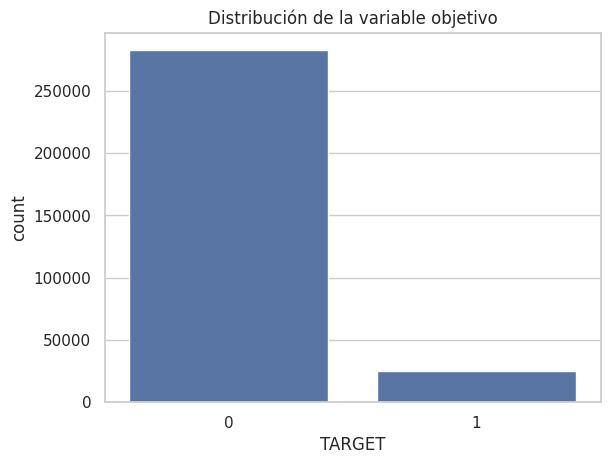

In [20]:
#Graficamos la distribuci√≥n de la variable objetivo
sns.countplot(x='TARGET', data=app_train)
plt.title('Distribuci√≥n de la variable objetivo')
plt.show()

- Podemos observar un desbalance de clase, indicando que normalmente hay mas buenos pagadores que malos pagadores.

####2.1.8 Correlaciones con la variable objetivo

In [21]:
target_corr = corr['TARGET'].sort_values(ascending=False) *100
target_corr

TARGET                         100.000000
DAYS_BIRTH                       7.823931
REGION_RATING_CLIENT_W_CITY      6.089267
REGION_RATING_CLIENT             5.889901
DAYS_LAST_PHONE_CHANGE           5.521848
                                  ...    
FLOORSMAX_AVG                   -4.400337
DAYS_EMPLOYED                   -4.493166
EXT_SOURCE_1                   -15.531713
EXT_SOURCE_2                   -16.047167
EXT_SOURCE_3                   -17.891870
Name: TARGET, Length: 106, dtype: float64

###2.2 Ahora revisamos los datasets secundarios

####2.2.1 Analisis Exploratorio inicial

In [22]:
ds_secundarios = {"bureau": bureau,
                  "bureau_balance": bureau_balance,
                  "previous_app": previous_app,
                  "pos_cash": pos_cash,
                  "credit_card": credit_card,
                  "installments": installments
}

for name,df in ds_secundarios.items():
  print("="*80)
  print(f"EDA del archivo: {name.upper()}")
  print("="*80)

  print("\nPrimeras filas:")
  display(df.head())

  print("\nInformaci√≥n general:")
  df.info()

  print("\nDescripci√≥n estad√≠stica:")
  display(df.describe())

  print("\nValores nulos:")
  nulos = df.isnull().mean().sort_values(ascending=False) * 100
  nulos = nulos[nulos > 0]
  print(nulos)

  print("\nValores Duplicados:")
  duplicates = df.duplicated().sum()
  print(f"Filas duplicadas encontradas: {duplicates}")

  if duplicates > 0:
      app_train.drop_duplicates(inplace=True)

  print("\nVariables categ√≥ricas:")
  for col in df.columns:
    if df[col].dtype == 'object':
      print(f"{col}: {df[col].nunique()} categorias")

  print("\n" + "-"*80 + "\n")

EDA del archivo: BUREAU

Primeras filas:


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN


Informaci√≥n general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB

Descripci√≥n estad√≠stica:


SK_ID_CURR  SK_ID_BUREAU   DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
count  1.716428e+06  1.716428e+06  1.716428e+06        1.716428e+06   
mean   2.782149e+05  5.924434e+06 -1.142108e+03        8.181666e-01   
std    1.029386e+05  5.322657e+05  7.951649e+02        3.654443e+01   
min    1.000010e+05  5.000000e+06 -2.922000e+03        0.000000e+00   
25%    1.888668e+05  5.463954e+06 -1.666000e+03        0.000000e+00   
50%    2.780550e+05  5.926304e+06 -9.870000e+02        0.000000e+00   
75%    3.674260e+05  6.385681e+06 -4.740000e+02        0.000000e+00   
max    4.562550e+05  6.843457e+06  0.000000e+00        2.792000e+03   

       DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
count         1.610875e+06       1.082775e+06            5.919400e+05   
mean          5.105174e+02      -1.017437e+03            3.825418e+03   
std           4.994220e+03       7.140106e+02            2.060316e+05   
min          -4.206000e+04      -4.202300e+04            0.000000e+00   
25%          -1.138000e+03      -1.489000e+03            0.000000e+00   
50%          -3.300000e+02      -8.970000e+02            0.000000e+00   
75%           4.740000e+02      -4.250000e+02            0.000000e+00   
max           3.119900e+04       0.000000e+00            1.159872e+08   

       CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
count        1.716428e+06    1.716415e+06         1.458759e+06   
mean         6.410406e-03    3.549946e+05         1.370851e+05   
std          9.622391e-02    1.149811e+06         6.774011e+05   
min          0.000000e+00    0.000000e+00        -4.705600e+06   
25%          0.000000e+00    5.130000e+04         0.000000e+00   
50%          0.000000e+00    1.255185e+05         0.000000e+00   
75%          0.000000e+00    3.150000e+05         4.015350e+04   
max          9.000000e+00    5.850000e+08         1.701000e+08   

       AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  DAYS_CREDIT_UPDATE  \
count          1.124648e+06            1.716428e+06        1.716428e+06   
mean           6.229515e+03            3.791276e+01       -5.937483e+02   
std            4.503203e+04            5.937650e+03        7.207473e+02   
min           -5.864061e+05            0.000000e+00       -4.194700e+04   
25%            0.000000e+00            0.000000e+00       -9.080000e+02   
50%            0.000000e+00            0.000000e+00       -3.950000e+02   
75%            0.000000e+00            0.000000e+00       -3.300000e+01   
max            4.705600e+06            3.756681e+06        3.720000e+02   

        AMT_ANNUITY  
count  4.896370e+05  
mean   1.571276e+04  
std    3.258269e+05  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    1.350000e+04  
max    1.184534e+08


Valores nulos:
AMT_ANNUITY               71.473490
AMT_CREDIT_MAX_OVERDUE    65.513264
DAYS_ENDDATE_FACT         36.916958
AMT_CREDIT_SUM_LIMIT      34.477415
AMT_CREDIT_SUM_DEBT       15.011932
DAYS_CREDIT_ENDDATE        6.149573
AMT_CREDIT_SUM             0.000757
dtype: float64

Valores Duplicados:
Filas duplicadas encontradas: 0

Variables categ√≥ricas:
CREDIT_ACTIVE: 4 categorias
CREDIT_CURRENCY: 4 categorias
CREDIT_TYPE: 15 categorias

--------------------------------------------------------------------------------

EDA del archivo: BUREAU_BALANCE

Primeras filas:


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C


Informaci√≥n general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB

Descripci√≥n estad√≠stica:


SK_ID_BUREAU  MONTHS_BALANCE
count  2.729992e+07    2.729992e+07
mean   6.036297e+06   -3.074169e+01
std    4.923489e+05    2.386451e+01
min    5.001709e+06   -9.600000e+01
25%    5.730933e+06   -4.600000e+01
50%    6.070821e+06   -2.500000e+01
75%    6.431951e+06   -1.100000e+01
max    6.842888e+06    0.000000e+00


Valores nulos:
Series([], dtype: float64)

Valores Duplicados:
Filas duplicadas encontradas: 0

Variables categ√≥ricas:
STATUS: 8 categorias

--------------------------------------------------------------------------------

EDA del archivo: PREVIOUS_APP

Primeras filas:


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]


Informaci√≥n general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT  

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115834    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]


Valores nulos:
RATE_INTEREST_PRIVILEGED     99.643698
RATE_INTEREST_PRIMARY        99.643698
AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
NAME_TYPE_SUITE              49.119754
DAYS_TERMINATION             40.298129
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
AMT_CREDIT                    0.000060
dtype: float64

Valores Duplicados:
Filas duplicadas encontradas: 0

Variables categ√≥ricas:
NAME_CONTRACT_TYPE: 4 categorias
WEEKDAY_APPR_PROCESS_START: 7 categorias
FLAG_LAST_APPL_PER_CONTRACT: 2 categorias
NAME_CASH_LOAN_PURPOSE: 25 categorias
NAME_CONTRACT_STATUS: 4 categorias
NAME_PAYMENT_TYPE: 4 categorias
CODE_REJECT_REASON: 9 categorias
NAME_TYPE_SUI

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0


Informaci√≥n general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB

Descripci√≥n estad√≠stica:


SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
count  1.000136e+07  1.000136e+07    1.000136e+07    9.975287e+06   
mean   1.903217e+06  2.784039e+05   -3.501259e+01    1.708965e+01   
std    5.358465e+05  1.027637e+05    2.606657e+01    1.199506e+01   
min    1.000001e+06  1.000010e+05   -9.600000e+01    1.000000e+00   
25%    1.434405e+06  1.895500e+05   -5.400000e+01    1.000000e+01   
50%    1.896565e+06  2.786540e+05   -2.800000e+01    1.200000e+01   
75%    2.368963e+06  3.674290e+05   -1.300000e+01    2.400000e+01   
max    2.843499e+06  4.562550e+05   -1.000000e+00    9.200000e+01   

       CNT_INSTALMENT_FUTURE        SK_DPD    SK_DPD_DEF  
count           9.975271e+06  1.000136e+07  1.000136e+07  
mean            1.048384e+01  1.160693e+01  6.544684e-01  
std             1.110906e+01  1.327140e+02  3.276249e+01  
min             0.000000e+00  0.000000e+00  0.000000e+00  
25%             3.000000e+00  0.000000e+00  0.000000e+00  
50%             7.000000e+00  0.000000e+00  0.000000e+00  
75%             1.400000e+01  0.000000e+00  0.000000e+00  
max             8.500000e+01  4.231000e+03  3.595000e+03


Valores nulos:
CNT_INSTALMENT_FUTURE    0.260835
CNT_INSTALMENT           0.260675
dtype: float64

Valores Duplicados:
Filas duplicadas encontradas: 0

Variables categ√≥ricas:
NAME_CONTRACT_STATUS: 9 categorias

--------------------------------------------------------------------------------

EDA del archivo: CREDIT_CARD

Primeras filas:


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]


Informaci√≥n general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19

SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE   AMT_BALANCE  \
count  3.840312e+06  3.840312e+06    3.840312e+06  3.840312e+06   
mean   1.904504e+06  2.783242e+05   -3.452192e+01  5.830016e+04   
std    5.364695e+05  1.027045e+05    2.666775e+01  1.063070e+05   
min    1.000018e+06  1.000060e+05   -9.600000e+01 -4.202502e+05   
25%    1.434385e+06  1.895170e+05   -5.500000e+01  0.000000e+00   
50%    1.897122e+06  2.783960e+05   -2.800000e+01  0.000000e+00   
75%    2.369328e+06  3.675800e+05   -1.100000e+01  8.904669e+04   
max    2.843496e+06  4.562500e+05   -1.000000e+00  1.505902e+06   

       AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
count             3.840312e+06              3.090496e+06   
mean              1.538080e+05              5.961325e+03   
std               1.651457e+05              2.822569e+04   
min               0.000000e+00             -6.827310e+03   
25%               4.500000e+04              0.000000e+00   
50%               1.125000e+05              0.000000e+00   
75%               1.800000e+05              0.000000e+00   
max               1.350000e+06              2.115000e+06   

       AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
count          3.840312e+06                3.090496e+06   
mean           7.433388e+03                2.881696e+02   
std            3.384608e+04                8.201989e+03   
min           -6.211620e+03                0.000000e+00   
25%            0.000000e+00                0.000000e+00   
50%            0.000000e+00                0.000000e+00   
75%            0.000000e+00                0.000000e+00   
max            2.287098e+06                1.529847e+06   

       AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  ...  \
count              3.090496e+06             3.535076e+06  ...   
mean               2.968805e+03             3.540204e+03  ...   
std                2.079689e+04             5.600154e+03  ...   
min                0.000000e+00             0.000000e+00  ...   
25%                0.000000e+00             0.000000e+00  ...   
50%                0.000000e+00             0.000000e+00  ...   
75%                0.000000e+00             6.633911e+03  ...   
max                2.239274e+06             2.028820e+05  ...   

       AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
count              3.840312e+06   3.840312e+06          3.840312e+06   
mean               5.596588e+04   5.808881e+04          5.809829e+04   
std                1.025336e+05   1.059654e+05          1.059718e+05   
min               -4.233058e+05  -4.202502e+05         -4.202502e+05   
25%                0.000000e+00   0.000000e+00          0.000000e+00   
50%                0.000000e+00   0.000000e+00          0.000000e+00   
75%                8.535924e+04   8.889949e+04          8.891451e+04   
max                1.472317e+06   1.493338e+06          1.493338e+06   

       CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
count              3.090496e+06          3.840312e+06   
mean               3.094490e-01          7.031439e-01   
std                1.100401e+00          3.190347e+00   
min                0.000000e+00          0.000000e+00   
25%                0.000000e+00          0.000000e+00   
50%                0.000000e+00          0.000000e+00   
75%                0.000000e+00          0.000000e+00   
max                5.100000e+01          1.650000e+02   

       CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  \
count                3.090496e+06              3.090496e+06   
mean                 4.812496e-03              5.594791e-01   
std                  8.263861e-02              3.240649e+00   
min                  0.000000e+00              0.000000e+00   
25%                  0.000000e+00              0.000000e+00   
50%                  0.000000e+00              0.000000e+00   
75%                  0.000000e+00              0.000000e+00   
max                  1.200000e+01              1.650000e+02   

       CNT_INST


Valores nulos:
AMT_PAYMENT_CURRENT           19.998063
CNT_DRAWINGS_POS_CURRENT      19.524872
AMT_DRAWINGS_ATM_CURRENT      19.524872
CNT_DRAWINGS_ATM_CURRENT      19.524872
AMT_DRAWINGS_POS_CURRENT      19.524872
AMT_DRAWINGS_OTHER_CURRENT    19.524872
CNT_DRAWINGS_OTHER_CURRENT    19.524872
CNT_INSTALMENT_MATURE_CUM      7.948208
AMT_INST_MIN_REGULARITY        7.948208
dtype: float64

Valores Duplicados:
Filas duplicadas encontradas: 0

Variables categ√≥ricas:
NAME_CONTRACT_STATUS: 7 categorias

--------------------------------------------------------------------------------

EDA del archivo: INSTALLMENTS

Primeras filas:


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585


Informaci√≥n general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB

Descripci√≥n estad√≠stica:


SK_ID_PREV    SK_ID_CURR  NUM_INSTALMENT_VERSION  \
count  1.360540e+07  1.360540e+07            1.360540e+07   
mean   1.903365e+06  2.784449e+05            8.566373e-01   
std    5.362029e+05  1.027183e+05            1.035216e+00   
min    1.000001e+06  1.000010e+05            0.000000e+00   
25%    1.434191e+06  1.896390e+05            0.000000e+00   
50%    1.896520e+06  2.786850e+05            1.000000e+00   
75%    2.369094e+06  3.675300e+05            1.000000e+00   
max    2.843499e+06  4.562550e+05            1.780000e+02   

       NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
count           1.360540e+07     1.360540e+07        1.360250e+07   
mean            1.887090e+01    -1.042270e+03       -1.051114e+03   
std             2.666407e+01     8.009463e+02        8.005859e+02   
min             1.000000e+00    -2.922000e+03       -4.921000e+03   
25%             4.000000e+00    -1.654000e+03       -1.662000e+03   
50%             8.000000e+00    -8.180000e+02       -8.270000e+02   
75%             1.900000e+01    -3.610000e+02       -3.700000e+02   
max             2.770000e+02    -1.000000e+00       -1.000000e+00   

       AMT_INSTALMENT   AMT_PAYMENT  
count    1.360540e+07  1.360250e+07  
mean     1.705091e+04  1.723822e+04  
std      5.057025e+04  5.473578e+04  
min      0.000000e+00  0.000000e+00  
25%      4.226085e+03  3.398265e+03  
50%      8.884080e+03  8.125515e+03  
75%      1.671021e+04  1.610842e+04  
max      3.771488e+06  3.771488e+06


Valores nulos:
AMT_PAYMENT           0.021352
DAYS_ENTRY_PAYMENT    0.021352
dtype: float64

Valores Duplicados:
Filas duplicadas encontradas: 0

Variables categ√≥ricas:

--------------------------------------------------------------------------------



###2.3 Tratamiento de Datos

####2.3.1 Convertimos a Flags en binario

In [23]:
app_train['HAS_CAR'] = app_train['FLAG_OWN_CAR'].map({'Y': 1, 'N': 0})
app_train['HAS_PROPERTY'] = app_train['FLAG_OWN_REALTY'].map({'Y': 1, 'N': 0})

####2.3.2 Creamos columnas numericas derivadas de fechas negativas

In [24]:
app_train['AGE_YEARS'] = (-app_train['DAYS_BIRTH']) / 365
app_train['EMPLOYMENT_YEARS'] = (-app_train['DAYS_EMPLOYED'].replace(365243, np.nan)) / 365
app_train['REGISTRATION_YEARS'] = (-app_train['DAYS_REGISTRATION']) / 365
app_train['ID_PUBLISH_YEARS'] = (-app_train['DAYS_ID_PUBLISH']) / 365
app_train['PHONE_CHANGE_YEARS'] = (-app_train['DAYS_LAST_PHONE_CHANGE']) / 365

####2.3.3 Creamos algunos ratios financieros base

In [25]:
app_train['CREDIT_INCOME_RATIO'] = app_train['AMT_CREDIT'] / app_train['AMT_INCOME_TOTAL']
app_train['ANNUITY_INCOME_RATIO'] = app_train['AMT_ANNUITY'] / app_train['AMT_INCOME_TOTAL']
app_train['CREDIT_GOODS_RATIO'] = app_train['AMT_CREDIT'] / app_train['AMT_GOODS_PRICE']
app_train['ANNUITY_CREDIT_RATIO'] = app_train['AMT_ANNUITY'] / app_train['AMT_CREDIT']

####2.3.4 Verificamos estructura final

In [26]:
print("\n‚úÖ Data wrangling de application_train completado")
print(app_train.shape)
app_train.head(3)


‚úÖ Data wrangling de application_train completado
(307511, 170)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   

   ...  AGE_YEARS EMPLOYMENT_YEARS REGISTRATION_YEARS ID_PUBLISH_YEARS  \
0  ...  25.920548         1.745205           9.994521         5.808219   
1  ...  45.931507         3.254795           3.249315         0.797260   
2  ...  52.180822         0.616438          11.671233         6.934247   

  LAST_PHONE_CHANGE_YEARS CREDIT_INCOME_RATIO  ANNUITY_INCOME_RATIO  \
0                3.106849            2.007889              0.121978   
1                2.268493            4.790750              0.132217   
2                2.232877            2.000000              0.100000   

   CREDIT_GOODS_RATIO  ANNUITY_CREDIT_RATIO  PHONE_CHANGE_YEARS  
0            1.158397              0.060749            3.106849  
1            1.145199              0.027598            2.268493  
2            1.000000              0.050000            2.232877  

[3 rows x 170 columns]

###2.4 Realizamos merge de las tablas secundarias a la principal

####2.4.1 Merge con Bureau

- Preparacion para el merge

In [27]:
print("‚û°Ô∏è  Tama√±o original:", bureau.shape)
print("‚û°Ô∏è  Porcentaje de nulos:")
print(bureau.isnull().mean().sort_values(ascending=False).head(10))

‚û°Ô∏è  Tama√±o original: (1716428, 17)
‚û°Ô∏è  Porcentaje de nulos:
AMT_ANNUITY               0.714735
AMT_CREDIT_MAX_OVERDUE    0.655133
DAYS_ENDDATE_FACT         0.369170
AMT_CREDIT_SUM_LIMIT      0.344774
AMT_CREDIT_SUM_DEBT       0.150119
DAYS_CREDIT_ENDDATE       0.061496
AMT_CREDIT_SUM            0.000008
SK_ID_CURR                0.000000
SK_ID_BUREAU              0.000000
CREDIT_DAY_OVERDUE        0.000000
dtype: float64


- Agregamos con groupby

In [28]:
def agg_bureau(bureau):
    b = bureau.copy()
    b.replace([np.inf, -np.inf], np.nan, inplace=True)
    b['CREDIT_ACTIVE_BINARY'] = (b['CREDIT_ACTIVE'] == 'Active').astype(int)

    # Definimos lo que queremos a√±adir
    g = b.groupby('SK_ID_CURR').agg(
        BUREAU_AMT_CREDIT_SUM_MEAN = ('AMT_CREDIT_SUM','mean'),
        BUREAU_AMT_CREDIT_SUM_SUM  = ('AMT_CREDIT_SUM','sum'),
        BUREAU_AMT_CREDIT_SUM_DEBT_MEAN = ('AMT_CREDIT_SUM_DEBT','mean'),
        BUREAU_AMT_CREDIT_MAX_OVERDUE_MEAN = ('AMT_CREDIT_MAX_OVERDUE','mean'),
        BUREAU_AMT_CREDIT_MAX_OVERDUE_MAX  = ('AMT_CREDIT_MAX_OVERDUE','max'),
        BUREAU_DAYS_CREDIT_MEAN = ('DAYS_CREDIT','mean'),
        BUREAU_DAYS_CREDIT_MIN  = ('DAYS_CREDIT','min'),
        BUREAU_CREDIT_ACTIVE_BINARY_SUM = ('CREDIT_ACTIVE_BINARY','sum'),
        BUREAU_N_LOANS = ('SK_ID_BUREAU','count')
    ).reset_index()
    return g

####2.4.2 Merge con Installment Payments

In [29]:
def agg_installments(installments):
    ins = installments.copy()
    ins['PAYMENT_DELAY'] = ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']
    ins['PAYMENT_RATIO'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
    ins.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Slice temporal inspirada en top teams: √∫ltimos 365 d√≠as
    last_365 = ins[ins['DAYS_INSTALMENT'] >= -365]

    g_all = ins.groupby('SK_ID_CURR').agg(
        INST_PAYMENT_DELAY_MEAN = ('PAYMENT_DELAY','mean'),
        INST_PAYMENT_DELAY_P95  = ('PAYMENT_DELAY', lambda s: np.nanpercentile(s,95)),
        INST_PAYMENT_RATIO_MEAN = ('PAYMENT_RATIO','mean'),
        INST_AMT_PAYMENT_SUM    = ('AMT_PAYMENT','sum'),
        INST_AMT_INSTALMENT_SUM = ('AMT_INSTALMENT','sum'),
        INST_N_PAYMENTS         = ('SK_ID_PREV','count')
    )

    g_365 = last_365.groupby('SK_ID_CURR').agg(
        INST365_PAYMENT_DELAY_MEAN = ('PAYMENT_DELAY','mean'),
        INST365_PAYMENT_RATIO_MEAN = ('PAYMENT_RATIO','mean')
    )

    g = g_all.join(g_365, how='left').reset_index()
    return g

####2.4.3 Merge con Credit Card Balance

In [30]:
def agg_credit_card(credit_card):
    cc = credit_card.copy()
    cc['BALANCE_RATIO'] = cc['AMT_BALANCE'] / cc['AMT_CREDIT_LIMIT_ACTUAL']
    cc['HAS_DPD'] = (cc['SK_DPD'] > 0).astype(int)
    cc.replace([np.inf, -np.inf], np.nan, inplace=True)

    g = cc.groupby('SK_ID_CURR').agg(
        CC_BALANCE_RATIO_MEAN = ('BALANCE_RATIO','mean'),
        CC_BALANCE_RATIO_MAX  = ('BALANCE_RATIO','max'),
        CC_AMT_DRAWINGS_SUM   = ('AMT_DRAWINGS_CURRENT','sum'),
        CC_AMT_BALANCE_MAX    = ('AMT_BALANCE','max'),
        CC_HAS_DPD_SUM        = ('HAS_DPD','sum'),
        CC_SK_DPD_MEAN        = ('SK_DPD','mean'),
        CC_SK_DPD_MAX         = ('SK_DPD','max'),
        CC_N_MONTHS           = ('MONTHS_BALANCE','count')
    ).reset_index()
    return g

####2.4.4 Merge con POS Cash Balance

In [31]:
def agg_pos(pos_cash):
    pos = pos_cash.copy()
    pos['REMAINING_RATIO'] = pos['CNT_INSTALMENT_FUTURE'] / pos['CNT_INSTALMENT']
    pos.replace([np.inf, -np.inf], np.nan, inplace=True)

    g = pos.groupby('SK_ID_CURR').agg(
        POS_REMAINING_RATIO_MEAN = ('REMAINING_RATIO','mean'),
        POS_SK_DPD_MEAN          = ('SK_DPD','mean'),
        POS_SK_DPD_MAX           = ('SK_DPD','max'),
        POS_SK_DPD_DEF_MEAN      = ('SK_DPD_DEF','mean'),
        POS_SK_DPD_DEF_MAX       = ('SK_DPD_DEF','max'),
        POS_CNT_INST_FUTURE_MAX  = ('CNT_INSTALMENT_FUTURE','max'),
        POS_N_RECORDS            = ('MONTHS_BALANCE','count')
    ).reset_index()
    return g

####2.4.5 Merge con Previous Application

In [32]:
def agg_previous(previous_app):
    prev = previous_app.copy()
    prev['APPLICATION_CREDIT_RATIO'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']
    prev['IS_REFUSED'] = (prev['NAME_CONTRACT_STATUS'] == 'Refused').astype(int)
    prev.replace([np.inf, -np.inf], np.nan, inplace=True)

    g_all = prev.groupby('SK_ID_CURR').agg(
        PREVAPP_AMT_APPLICATION_MEAN = ('AMT_APPLICATION','mean'),
        PREVAPP_AMT_CREDIT_MEAN      = ('AMT_CREDIT','mean'),
        PREVAPP_APPLICATION_CREDIT_RATIO_MEAN = ('APPLICATION_CREDIT_RATIO','mean'),
        PREVAPP_IS_REFUSED_SUM       = ('IS_REFUSED','sum'),
        PREVAPP_CNT_PAYMENT_MEAN     = ('CNT_PAYMENT','mean'),
        PREVAPP_DAYS_DECISION_MEAN   = ('DAYS_DECISION','mean'),
        PREVAPP_N_APPS               = ('SK_ID_PREV','count')
    )

    # Slice ‚Äú√∫ltimas 3‚Äù aplicaciones por cliente (robusto y √∫til)
    prev_sorted = prev.sort_values(['SK_ID_CURR','DAYS_DECISION'], ascending=[True, True])
    last3 = prev_sorted.groupby('SK_ID_CURR').tail(3)
    g_last3 = last3.groupby('SK_ID_CURR').agg(
        PREVAPP_LAST3_CREDIT_MEAN = ('AMT_CREDIT','mean'),
        PREVAPP_LAST3_APP_CREDIT_RATIO_MEAN = ('APPLICATION_CREDIT_RATIO','mean'),
        PREVAPP_LAST3_REFUSED_SUM = ('IS_REFUSED','sum')
    )

    g = g_all.join(g_last3, how='left').reset_index()
    return g

####2.4.6 Realizamos el merge de forma progresiva

In [33]:
features = app_train.copy()
for feat_df in [agg_bureau(bureau),
                agg_installments(installments),
                agg_credit_card(credit_card),
                agg_pos(pos_cash),
                agg_previous(previous_app)]:
    features = features.merge(feat_df, on='SK_ID_CURR', how='left')

print("‚úÖ Enriquecimiento completado. Shape:", features.shape)
app_train = features.copy()

/usr/local/lib/python3.12/dist-packages/numpy/lib/_nanfunctions_impl.py:1424: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


‚úÖ Enriquecimiento completado. Shape: (307511, 212)


####2.4.7 Reimputamos despues del merge

In [34]:
num_cols = app_train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = app_train.select_dtypes(exclude=[np.number]).columns.tolist()

for col in cat_cols:
    if app_train[col].isna().any():
        app_train[col] = app_train[col].fillna('Missing')

for col in num_cols:
    if app_train[col].isna().any():
        app_train[col] = app_train[col].fillna(app_train[col].median())

print("‚úÖ Re-imputaci√≥n final aplicada. Nulos totales:",
      int(app_train.isna().sum().sum()))

‚úÖ Re-imputaci√≥n final aplicada. Nulos totales: 0


#***3. EDA Exploratorio***

###3.1 Revisamos m√©tricas relevantes

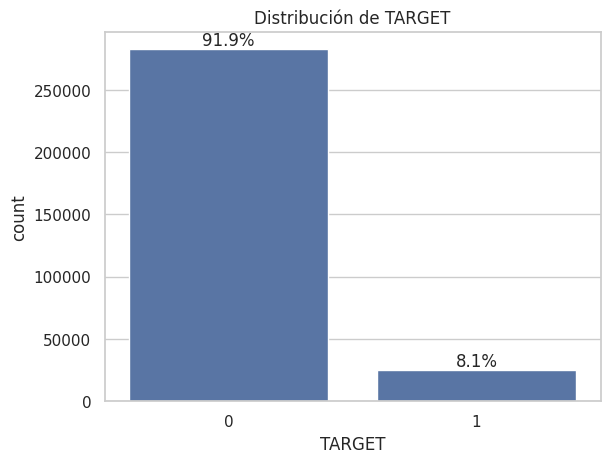

In [35]:
# Distribuci√≥n de TARGET con porcentajes
ax = sns.countplot(x='TARGET', data=app_train, order=[0,1])
ax.bar_label(ax.containers[0],
             labels=[f"{p*100:.1f}%" for p in app_train['TARGET']
                     .value_counts(normalize=True).reindex([0,1]).values])
plt.title('Distribuci√≥n de TARGET'); plt.show()

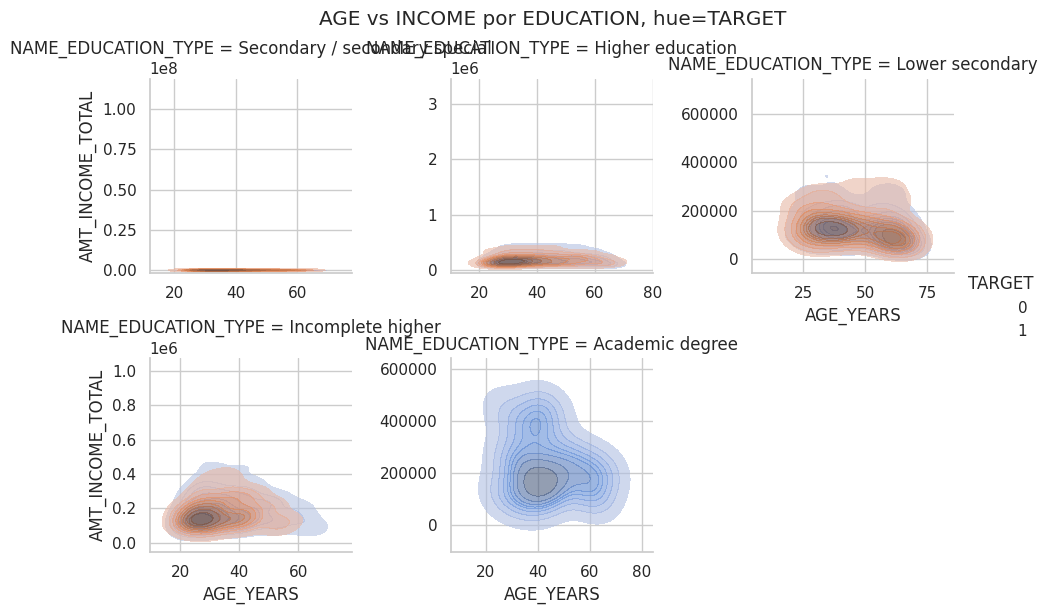

In [36]:
# Edad e ingreso por nivel educativo, coloreado por TARGET
sample = app_train.sample(n=min(50000, len(app_train)), random_state=42)
g = sns.FacetGrid(sample, col='NAME_EDUCATION_TYPE', hue='TARGET',
                  col_wrap=3, height=3, sharex=False, sharey=False)
g.map_dataframe(sns.kdeplot, x='AGE_YEARS', y='AMT_INCOME_TOTAL',
                fill=True, thresh=0.05, alpha=0.6)
g.add_legend(); g.fig.suptitle('AGE vs INCOME por EDUCATION, hue=TARGET', y=1.02)
plt.show()

In [37]:
# Correlaciones con TARGET (num√©ricas)
corr = app_train.select_dtypes(include=np.number).corr()
target_corr = corr['TARGET'].sort_values(ascending=False)
display(target_corr.head(15), target_corr.tail(15))

TARGET                             1.000000
BUREAU_DAYS_CREDIT_MEAN            0.082079
DAYS_BIRTH                         0.078239
CC_BALANCE_RATIO_MEAN              0.075047
PREVAPP_LAST3_REFUSED_SUM          0.069984
CREDIT_GOODS_RATIO                 0.068474
BUREAU_DAYS_CREDIT_MIN             0.067388
PREVAPP_IS_REFUSED_SUM             0.064756
DAYS_EMPLOYED                      0.063368
REGION_RATING_CLIENT_W_CITY        0.060893
BUREAU_CREDIT_ACTIVE_BINARY_SUM    0.060544
REGION_RATING_CLIENT               0.058899
DAYS_LAST_PHONE_CHANGE             0.055218
DAYS_ID_PUBLISH                    0.051457
REG_CITY_NOT_WORK_CITY             0.050994
Name: TARGET, dtype: float64

OCCUPATION_TYPE__imputed_flag   -0.038690
FLOORSMAX_MEDI                  -0.039157
FLOORSMAX_AVG                   -0.039385
AMT_GOODS_PRICE                 -0.039623
REGISTRATION_YEARS              -0.041975
DAYS_EMPLOYED__imputed_flag     -0.045987
ID_PUBLISH_YEARS                -0.051457
LAST_PHONE_CHANGE_YEARS         -0.055218
PHONE_CHANGE_YEARS              -0.055218
EMPLOYMENT_YEARS                -0.063368
AGE_YEARS                       -0.078239
EXT_SOURCE_1                    -0.098887
EXT_SOURCE_3                    -0.155892
EXT_SOURCE_2                    -0.160295
OWN_CAR_AGE__imputed_flag             NaN
Name: TARGET, dtype: float64

In [38]:
# Mann‚ÄìWhitney AGE_YEARS ~ TARGET
grp0 = app_train.loc[app_train['TARGET']==0, 'AGE_YEARS'].dropna().values
grp1 = app_train.loc[app_train['TARGET']==1, 'AGE_YEARS'].dropna().values
u_stat, p_val = mannwhitneyu(grp0, grp1, alternative='two-sided')
print(f"Mann‚ÄìWhitney U (AGE_YEARS vs TARGET): U={u_stat:.0f}, p={p_val:.3e}")

# Bootstrap 95% CI diferencia de medianas (0-1)
rng = np.random.default_rng(42)
diffs = []
for _ in range(1000):
    d0 = rng.choice(grp0, size=len(grp0), replace=True)
    d1 = rng.choice(grp1, size=len(grp1), replace=True)
    diffs.append(np.median(d0) - np.median(d1))
ci = (np.percentile(diffs, 2.5), np.percentile(diffs, 97.5))
print(f"Dif. mediana AGE (0-1): {np.median(grp0)-np.median(grp1):.2f} a√±os; 95% CI {ci}")

# Chi¬≤ TARGET ~ CODE_GENDER
if {'CODE_GENDER','TARGET'}.issubset(app_train.columns):
    tab = pd.crosstab(app_train['CODE_GENDER'], app_train['TARGET'])
    chi2, p, dof, exp = chi2_contingency(tab)
    print("Chi¬≤ TARGET ~ CODE_GENDER -> chi2=%.2f, p=%.3e, dof=%d" % (chi2, p, dof))

# Point-biserial TARGET ~ ANNUITY_INCOME_RATIO
if {'ANNUITY_INCOME_RATIO','TARGET'}.issubset(app_train.columns):
    r_pb, p_pb = pointbiserialr(app_train['TARGET'], app_train['ANNUITY_INCOME_RATIO'])
    print(f"Point-biserial TARGET ~ ANNUITY_INCOME_RATIO: r={r_pb:.3f}, p={p_pb:.3e}")

Mann‚ÄìWhitney U (AGE_YEARS vs TARGET): U=4091325258, p=0.000e+00
Dif. mediana AGE (0-1): 4.37 a√±os; 95% CI (np.float64(4.164178082191783), np.float64(4.5917808219178085))
Chi¬≤ TARGET ~ CODE_GENDER -> chi2=920.79, p=1.129e-200, dof=2
Point-biserial TARGET ~ ANNUITY_INCOME_RATIO: r=0.014, p=2.517e-15


###3.2 Respondemos las preguntas de investigaci√≥n

In [39]:
# Sampleamos para legibilidad
samp = app_train.sample(n=min(60000, len(app_train)), random_state=123)

####Pregunta 1. ¬øCu√°les son los factores socioecon√≥micos m√°s relevantes que influyen en el incumplimiento de pagos crediticios?

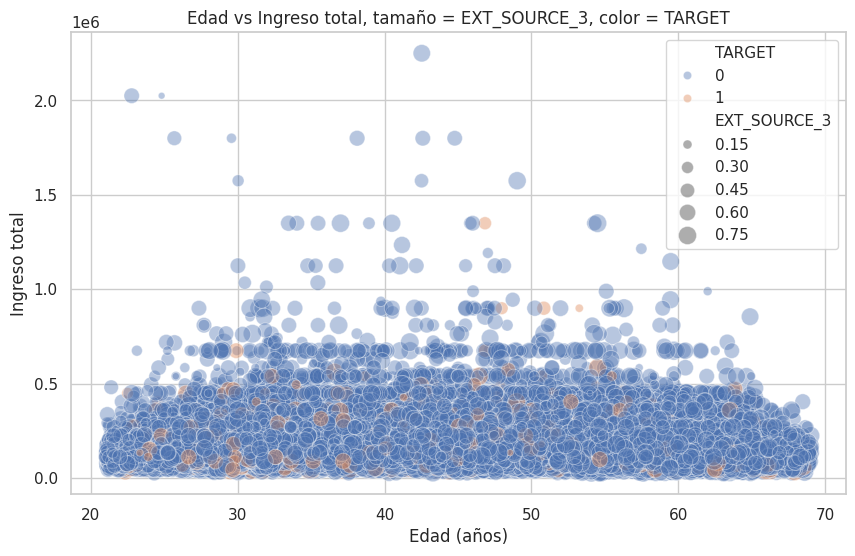

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=samp,
    x='AGE_YEARS',
    y='AMT_INCOME_TOTAL',
    hue='TARGET',
    size='EXT_SOURCE_3',
    sizes=(10, 200),
    alpha=0.4
)
plt.title('Edad vs Ingreso total, tama√±o = EXT_SOURCE_3, color = TARGET')
plt.xlabel('Edad (a√±os)')
plt.ylabel('Ingreso total')
plt.show()

####Respuesta: Vemos que EXT_SOURCE_3 (score externo) y el nivel de ingresos, son factores socioecon√≥micos relevantes para explicar el riesgo de incumplimiento.

- Tambien, que la edad por s√≠ sola no parece tener un patr√≥n claro, los clientes con bajo score externo y bajos ingresos muestran una mayor probabilidad de incumplir pagos (TARGET = 1).

####Pregunta 2. ¬øQu√© relaci√≥n existe entre el historial crediticio externo (bureau) y la probabilidad de default en nuevos cr√©ditos?

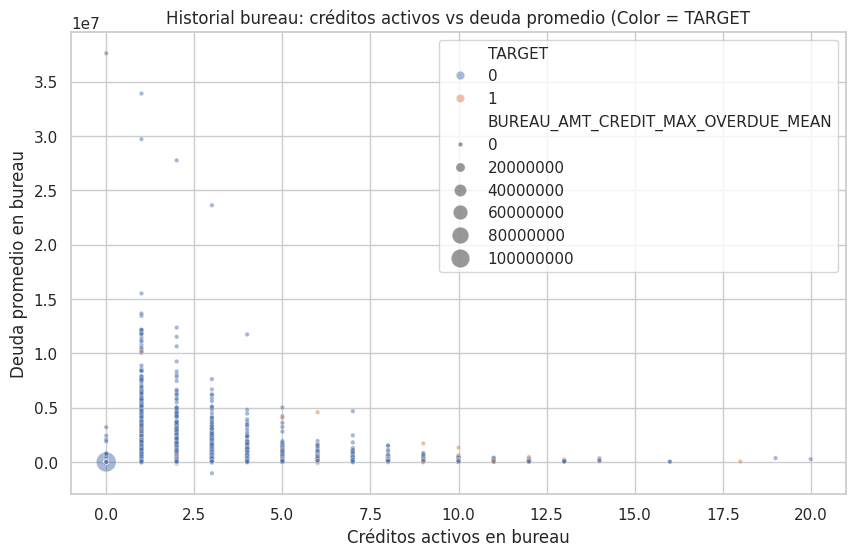

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=samp,
    x='BUREAU_CREDIT_ACTIVE_BINARY_SUM',
    y='BUREAU_AMT_CREDIT_SUM_DEBT_MEAN',
    hue='TARGET',
    size='BUREAU_AMT_CREDIT_MAX_OVERDUE_MEAN',
    sizes=(10, 200),
    alpha=0.5
)
plt.title('Historial bureau: cr√©ditos activos vs deuda promedio (Color = TARGET')
plt.xlabel('Cr√©ditos activos en bureau')
plt.ylabel('Deuda promedio en bureau')
plt.show()

####Respuesta: Existe una relaci√≥n significativa entre el historial crediticio externo y el riesgo de incumplimiento.

- En particular, los clientes con pocos cr√©ditos activos, deuda promedio m√°s alta y mayores atrasos hist√≥ricos presentan una mayor probabilidad de default.
Este comportamiento respalda la importancia del bureau como fuente de predicci√≥n del riesgo crediticio.

####Pregunta 3. ¬øEn qu√© medida los rechazos previos de solicitudes afectan la probabilidad de impago actual?

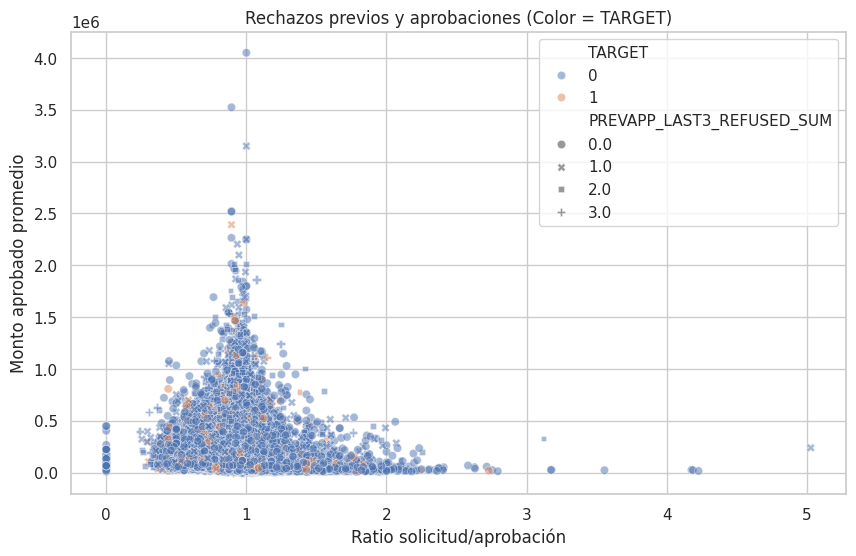

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=samp,
    x='PREVAPP_APPLICATION_CREDIT_RATIO_MEAN',
    y='PREVAPP_AMT_CREDIT_MEAN',
    hue='TARGET',
    style='PREVAPP_LAST3_REFUSED_SUM',
    alpha=0.5
)
plt.title('Rechazos previos y aprobaciones (Color = TARGET)')
plt.xlabel('Ratio solicitud/aprobaci√≥n')
plt.ylabel('Monto aprobado promedio')
plt.show()

####Respuesta: Se observa una relaci√≥n clara entre el historial de rechazos previos y el riesgo de impago actual.

- Clientes con una mayor cantidad de rechazos (PREVAPP_IS_REFUSED_SUM alto), especialmente aquellos con ratios solicitud/aprobaci√≥n altos y montos aprobados bajos, muestran una mayor concentraci√≥n de impagos (TARGET = 1).
Esto sugiere que los rechazos anteriores pueden actuar como un indicador temprano de fragilidad crediticia, √∫til para la evaluaci√≥n de riesgo actual.

####Pregunta 4. ¬øC√≥mo impacta el ratio deuda/ingresos en la capacidad de pago de los clientes?


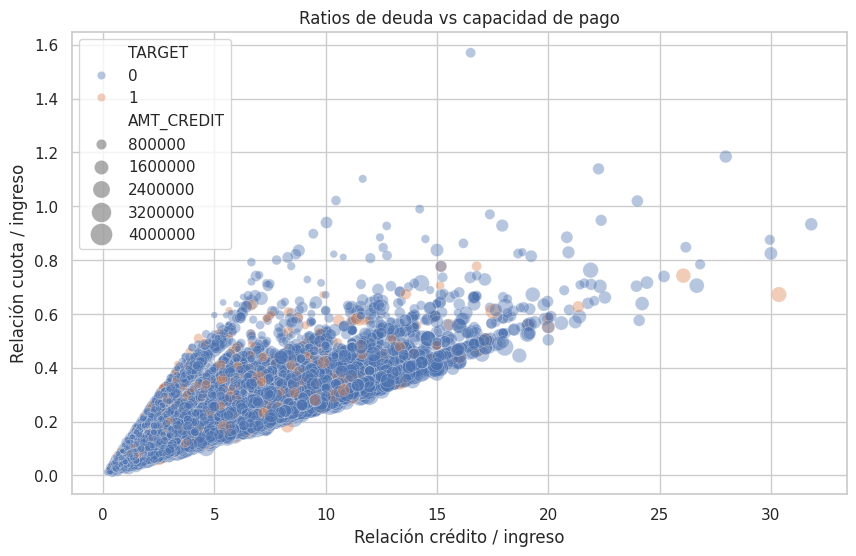

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=samp,
    x='CREDIT_INCOME_RATIO',
    y='ANNUITY_INCOME_RATIO',
    hue='TARGET',
    size='AMT_CREDIT',
    sizes=(10, 250),
    alpha=0.4
)
plt.title('Ratios de deuda vs capacidad de pago')
plt.xlabel('Relaci√≥n cr√©dito / ingreso')
plt.ylabel('Relaci√≥n cuota / ingreso')
plt.show()

####Respuesta: El ratio deuda/ingresos impacta negativamente en la capacidad de pago: a mayor proporci√≥n de deuda o pagos en relaci√≥n a los ingresos del cliente, mayor es la probabilidad de dificultades financieras.

- Los bancos deber√≠an considerar establecer l√≠mites prudentes en estos ratios (especialmente mantener ANNUITY_INCOME_RATIO por debajo de 0.5) para gestionar adecuadamente el riesgo crediticio.

####Pregunta 5. ¬øExisten patrones temporales o comportamientos repetitivos en pagos atrasados que ayuden a anticipar la morosidad?

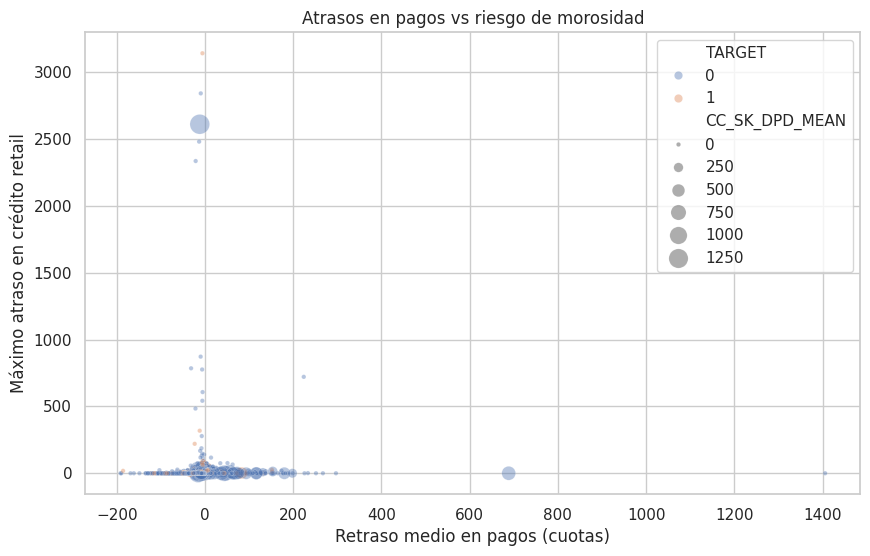

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=samp,
    x='INST_PAYMENT_DELAY_MEAN',
    y='POS_SK_DPD_DEF_MAX',
    hue='TARGET',
    size='CC_SK_DPD_MEAN',
    sizes=(10, 200),
    alpha=0.4
)
plt.title('Atrasos en pagos vs riesgo de morosidad')
plt.xlabel('Retraso medio en pagos (cuotas)')
plt.ylabel('M√°ximo atraso en cr√©dito retail')
plt.show()

####Respuesta: S√≠ existen patrones temporales repetitivos que permiten anticipar la morosidad:

- Los retrasos recurrentes (especialmente cuando superan ciertos umbrales) son un predictor fuerte de futuros impagos.

- El historial de atrasos en cr√©ditos retail (POS) combinado con retrasos en cuotas (INST) proporciona se√±ales claras de riesgo.

- Se recomienda monitorear especialmente a clientes que superen los 500 d√≠as de retraso en cualquier producto crediticio, ya que presentan mayor probabilidad de entrar en morosidad.

###3.3 Respondemos las hip√≥tesis

#### Hipotesis 1. La proporci√≥n de ingresos destinada al pago de deuda (debt-to-income ratio) tiene un efecto positivo significativo sobre la probabilidad de default, incrementando el riesgo a medida que se eleva dicho ratio.

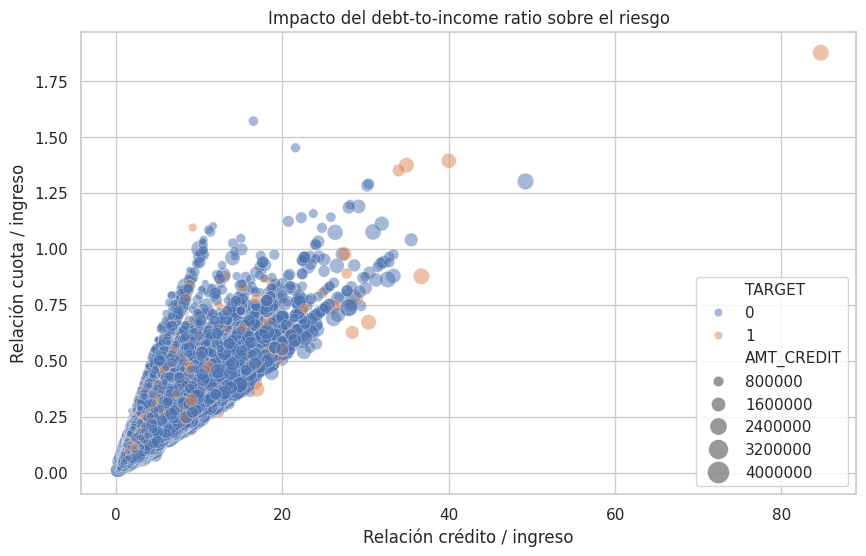

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=app_train,
    x='CREDIT_INCOME_RATIO',
    y='ANNUITY_INCOME_RATIO',
    hue='TARGET',
    size='AMT_CREDIT',
    sizes=(10, 250),
    alpha=0.5
)
plt.title('Impacto del debt-to-income ratio sobre el riesgo')
plt.xlabel('Relaci√≥n cr√©dito / ingreso')
plt.ylabel('Relaci√≥n cuota / ingreso')
plt.show()

####Respuesta: Vemos que existe un efecto positivo significativo entre el debt-to-income ratio y la probabilidad de default.

El grafico nos muestra que:

- El riesgo crece de forma no lineal: aumenta aceleradamente al superar ciertos umbrales cr√≠ticos en los ratios.

- El ratio ANNUITY_INCOME_RATIO (cuota/ingreso) parece ser m√°s discriminante que el CREDIT_INCOME_RATIO para predecir default.

- Este efecto se mantiene consistente independientemente del monto del cr√©dito.

####Hip√≥tesis 2. Los clientes con antecedentes de pagos atrasados recurrentes en sus cr√©ditos previos presentan una probabilidad significativamente mayor de incumplimiento en nuevos pr√©stamos, incluso tras controlar otras variables socioecon√≥micas.

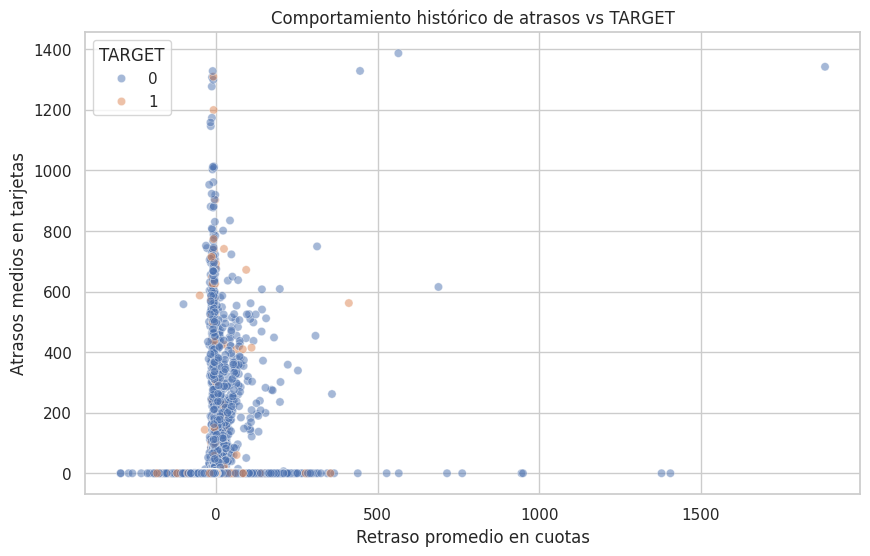

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=app_train,
    x='INST_PAYMENT_DELAY_MEAN',
    y='CC_SK_DPD_MEAN',
    hue='TARGET',
    alpha=0.5
)
plt.title('Comportamiento hist√≥rico de atrasos vs TARGET')
plt.xlabel('Retraso promedio en cuotas')
plt.ylabel('Atrasos medios en tarjetas')
plt.show()

####Respuesta: Los antecedentes de pagos atrasados son predictores poderosos de incumplimiento futuro.

Espec√≠ficamente:

- La recurrencia de atrasos (en m√∫ltiples productos y a lo largo del tiempo) muestra una relaci√≥n causal con la probabilidad de default.

- Este efecto persiste independientemente de otras variables, como sugiere la concentraci√≥n consistente de casos problem√°ticos en zonas de alto historial de atrasos.

- El patr√≥n es particularmente fuerte cuando los atrasos ocurren simult√°neamente en diferentes tipos de cr√©dito.

####Hip√≥tesis 3. El n√∫mero de solicitudes de cr√©dito rechazadas en el pasado se asocia de forma directa con un mayor riesgo de default en solicitudes actuales, actuando como indicador de fragilidad crediticia.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


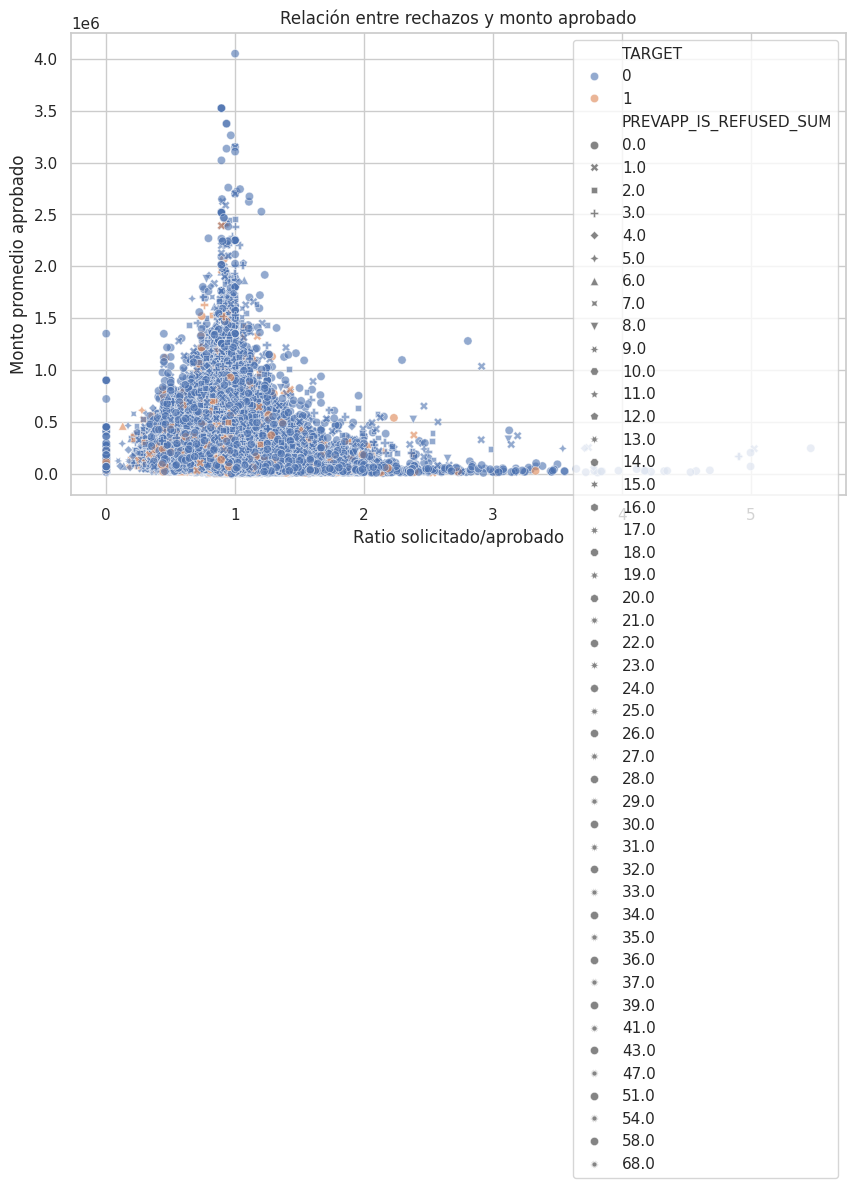

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=app_train,
    x='PREVAPP_APPLICATION_CREDIT_RATIO_MEAN',
    y='PREVAPP_AMT_CREDIT_MEAN',
    hue='TARGET',
    style='PREVAPP_IS_REFUSED_SUM', # Corrected column name
    alpha=0.6
)
plt.title('Relaci√≥n entre rechazos y monto aprobado')
plt.xlabel('Ratio solicitado/aprobado')
plt.ylabel('Monto promedio aprobado')
plt.show()

####Respuesta: El historial de rechazos es un indicador v√°lido de fragilidad crediticia.

Espec√≠ficamente:

- Los clientes con m√∫ltiples rechazos previos (especialmente >3) tienen significativamente mayor probabilidad de incumplimiento

- El ratio solicitado/aprobado act√∫a como amplificador de este riesgo cuando es elevado

- La combinaci√≥n de ambos factores (rechazos + ratio alto) muestra el peor perfil de riesgo

####Hip√≥tesis 4. La estabilidad laboral (definida por la duraci√≥n del empleo actual) funciona como un factor protector, reduciendo de forma significativa la probabilidad de impago.

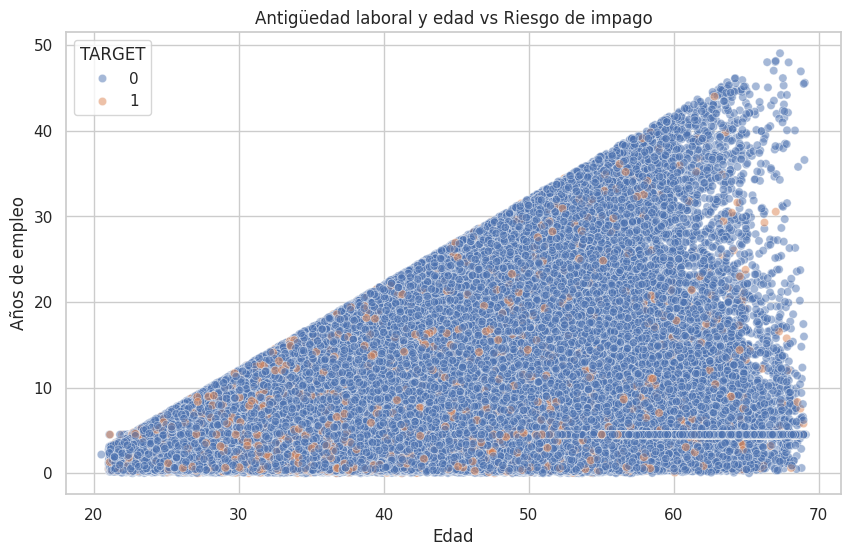

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=app_train,
    x='AGE_YEARS',
    y='EMPLOYMENT_YEARS',
    hue='TARGET',
    alpha=0.5
)
plt.title('Antig√ºedad laboral y edad vs Riesgo de impago')
plt.xlabel('Edad')
plt.ylabel('A√±os de empleo')
plt.show()

####Respuesta: La estabilidad laboral demuestra un efecto protector significativo contra el impago.

Espec√≠ficamente:

- Cada a√±o adicional en el mismo empleo reduce progresivamente el riesgo crediticio.

- El efecto es m√°s pronunciado despu√©s de superar los 5 a√±os de antig√ºedad.

- La combinaci√≥n de edad madura (>35) y estabilidad laboral (>5 a√±os) presenta el perfil de menor riesgo.

####Hip√≥tesis 5. Las variables relacionadas con el historial crediticio externo (por ejemplo, n√∫mero de pr√©stamos activos y comportamiento de pago reportado en bureau.csv) influyen significativamente en la clasificaci√≥n de riesgo crediticio del solicitante, mejorando la capacidad de predicci√≥n del modelo.

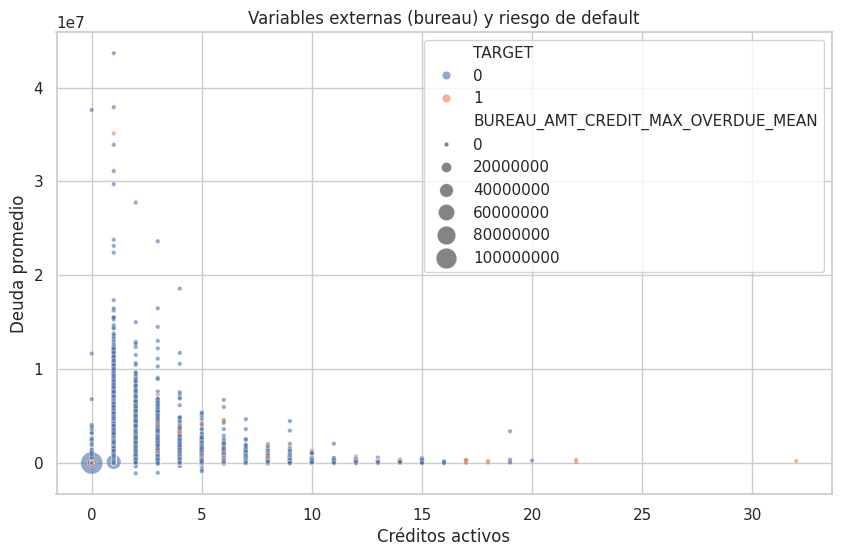

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=app_train,
    x='BUREAU_CREDIT_ACTIVE_BINARY_SUM',
    y='BUREAU_AMT_CREDIT_SUM_DEBT_MEAN',
    hue='TARGET',
    size='BUREAU_AMT_CREDIT_MAX_OVERDUE_MEAN',
    sizes=(10, 250),
    alpha=0.6
)
plt.title('Variables externas (bureau) y riesgo de default')
plt.xlabel('Cr√©ditos activos')
plt.ylabel('Deuda promedio')
plt.show()

####Respuesta:  El historial crediticio externo es un predictor poderoso del riesgo.

Espec√≠ficamente:

- Las variables de bureau mejoran significativamente la capacidad predictiva al:

  - Identificar patrones de sobreendeudamiento

  - Detectar acumulaci√≥n de productos crediticios

  - Revelar morosidad hist√≥rica no visible en datos internos

- El efecto es acumulativo y no lineal - el riesgo crece exponencialmente cuando coinciden m√∫ltiples factores negativos.

###3.4 Analisis por deciles de Retraso en Pagos

/tmp/ipython-input-3235137970.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_rate = (tmp.groupby('bin')['TARGET']


bin  default_rate
0  (-295.001, -21.615]      0.073379
1   (-21.615, -16.091]      0.065318
2   (-16.091, -13.071]      0.070685
3   (-13.071, -10.889]      0.076025
4    (-10.889, -9.542]      0.069565
5     (-9.542, -8.333]      0.083568
6     (-8.333, -6.808]      0.084553
7     (-6.808, -5.275]      0.086453
8     (-5.275, -3.412]      0.095035
9   (-3.412, 1884.205]      0.106337

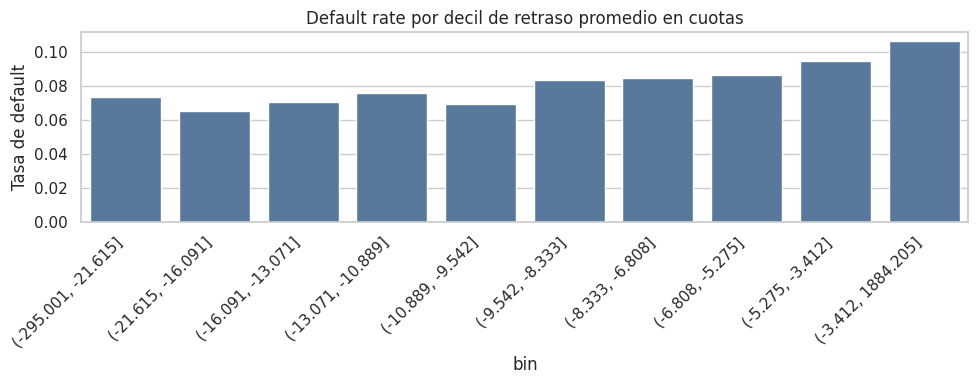

In [50]:
# Binning en deciles de INST_PAYMENT_DELAY_MEAN y tasa de default por bin
col = 'INST_PAYMENT_DELAY_MEAN'

# Construimos bins en todo el train para estabilidad
notna = app_train[col].notna()
bins = pd.qcut(app_train.loc[notna, col], q=10, duplicates='drop')

tmp = pd.DataFrame({
    'bin': bins,
    'TARGET': app_train.loc[notna, 'TARGET'].values
})
# Agregamos categor√≠a expl√≠cita para los NaN (si los hay)
if (~notna).any():
    tmp = pd.concat([
        tmp,
        pd.DataFrame({'bin': pd.Categorical(['Missing'] * (~notna).sum()),
                      'TARGET': app_train.loc[~notna, 'TARGET'].values})
    ], ignore_index=True)

bin_rate = (tmp.groupby('bin')['TARGET']
              .mean()
              .reset_index(name='default_rate')
              .sort_values('bin'))

display(bin_rate)

plt.figure(figsize=(10,4))
sns.barplot(data=bin_rate, x='bin', y='default_rate', color='#4C78A8')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Tasa de default')
plt.title('Default rate por decil de retraso promedio en cuotas')
plt.tight_layout(); plt.show()

#***4. Feature Engineering***

###4.1 Incluimos ratios adicionales

In [51]:
if {'AMT_CREDIT','AMT_ANNUITY'}.issubset(app_train.columns):
    app_train['CREDIT_ANNUITY_RATIO'] = app_train['AMT_CREDIT'] / app_train['AMT_ANNUITY']
if {'AMT_CREDIT','AMT_GOODS_PRICE'}.issubset(app_train.columns):
    app_train['CREDIT_GOODS_PRICE_RATIO'] = app_train['AMT_CREDIT'] / app_train['AMT_GOODS_PRICE']
if {'REGION_POPULATION_RELATIVE'}.issubset(app_train.columns):
    # Tratar regi√≥n como categ√≥rica (hallazgo de Top Team)
    app_train['REGION_POP_CAT'] = pd.qcut(app_train['REGION_POPULATION_RELATIVE'],
                                          q=10, duplicates='drop').astype(str)

###4.2 Ultimas N de prev_apps

In [52]:
#Ya agregamos √∫ltimas 3 arriba.
#A√±adimos ‚Äúprimeras 2‚Äù como contraste temporal.
prev_sorted = previous_app.sort_values(['SK_ID_CURR','DAYS_DECISION'], ascending=[True, True])
first2 = prev_sorted.groupby('SK_ID_CURR').head(2)
g_first2 = first2.groupby('SK_ID_CURR').agg(
    PREVAPP_FIRST2_CREDIT_MEAN=('AMT_CREDIT','mean'),
    PREVAPP_FIRST2_APP_CREDIT_RATIO_MEAN=('AMT_APPLICATION','mean')
).reset_index()
app_train = app_train.merge(g_first2, on='SK_ID_CURR', how='left')

###4.3 Ponderaciones por recencia

In [53]:
#Media ponderada por ‚Äúcercan√≠a‚Äù (m√°s reciente, m√°s peso)
ins = installments.copy()
ins['PAYMENT_DELAY'] = ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']
ins['w'] = np.exp(ins['DAYS_INSTALMENT'] / 180.0)  # ventana ~6 meses
w_agg = ins.groupby('SK_ID_CURR').apply(
    lambda g: pd.Series({
        'INST_WAVG_DELAY': np.average(g['PAYMENT_DELAY'].dropna(), weights=g['w'].loc[g['PAYMENT_DELAY'].notna()]) if g['PAYMENT_DELAY'].notna().any() else np.nan
    })
).reset_index()
app_train = app_train.merge(w_agg, on='SK_ID_CURR', how='left')

/tmp/ipython-input-1576541102.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  w_agg = ins.groupby('SK_ID_CURR').apply(


###4.4 Conteos √∫tiles(complejidad crediticia)

In [54]:
for col, newcol in [
    ('BUREAU_N_LOANS', 'N_BUREAU_LOANS'),
    ('CC_N_MONTHS', 'N_CC_MONTHS'),
    ('POS_N_RECORDS', 'N_POS_RECORDS'),
    ('INST_N_PAYMENTS', 'N_INST_PAYMENTS'),
    ('PREVAPP_N_APPS', 'N_PREV_APPS')
]:
    if col in app_train.columns:
        app_train[newcol] = app_train[col]

print("‚úÖ Feature engineering avanzada a√±adida. Shape:", app_train.shape)


‚úÖ Feature engineering avanzada a√±adida. Shape: (307511, 223)


#***5. Configuraci√≥n de pipeline***

###5.1 Configuraci√≥n inicial

In [55]:
RANDOM_STATE = 42
N_SPLITS = 5

def ks_statistic(y_true, y_score):
    """
    KS = max|TPR - FPR| sobre todos los umbrales.
    """
    fpr, tpr, thr = roc_curve(y_true, y_score)
    ks = np.max(np.abs(tpr - fpr))
    return ks

def optimal_threshold_youdenJ(y_true, y_score):
    """
    Umbral √≥ptimo por Youden J = TPR - FPR.
    """
    fpr, tpr, thr = roc_curve(y_true, y_score)
    j = tpr - fpr
    idx = np.argmax(j)
    return thr[idx], tpr[idx], fpr[idx]


###5.2 Selecci√≥n de variables y matrices x,y

In [56]:
# Columnas a excluir (IDs, objetivo, columnas puramente administrativas)
EXCLUDE_COLS = {
    'TARGET', 'SK_ID_CURR', 'SK_ID_BUREAU', 'SK_ID_PREV'
}

# Si mantuviste SK_ID_CURR en app_train, no pasa nada; lo excluimos expl√≠citamente
all_cols = app_train.columns.tolist()
feat_cols = [c for c in all_cols if c not in EXCLUDE_COLS]

# Separaci√≥n X, y
y = app_train['TARGET'].astype(int)
X = app_train[feat_cols].copy()

# Identificar tipos
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"Total features: {X.shape[1]} | Num√©ricas: {len(num_cols)} | Categ√≥ricas: {len(cat_cols)}")


Total features: 221 | Num√©ricas: 205 | Categ√≥ricas: 16


###5.3 Pipeline

In [57]:
num_tf = Pipeline(steps=[
    ('imp', SimpleImputer(strategy='median')),
    ('sc', RobustScaler(with_centering=False))
])

cat_tf = Pipeline(steps=[
    ('imp', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01))
])

preprocess = ColumnTransformer(
    transformers=[
        ('num', num_tf, num_cols),
        ('cat', cat_tf, cat_cols)
    ],
    remainder='drop',
    n_jobs=None
)

###5.4 CV gen√©rico con OOF y M√©tricas

In [58]:
def cross_validate_model(base_estimator, X, y, preprocess, n_splits=5, random_state=42, verbose=True):
    """
    Devuelve:
      - oof_pred: probabilidades OOF (len = n_muestras)
      - metrics: dict con ROC-AUC, PR-AUC, KS
      - folds_models: modelos entrenados por fold (para importancia / an√°lisis)
    """
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    oof_pred = np.zeros(len(y), dtype=float)
    folds_models = []

    for i, (tr, va) in enumerate(skf.split(X, y), start=1):
        Xtr, Xva = X.iloc[tr], X.iloc[va]
        ytr, yva = y.iloc[tr], y.iloc[va]

        pipe = Pipeline(steps=[('pre', preprocess), ('clf', base_estimator)])
        pipe.fit(Xtr, ytr)

        # Guardar modelo del fold
        folds_models.append(pipe)

        oof_pred[va] = pipe.predict_proba(Xva)[:, 1]
        if verbose:
            fold_auc = roc_auc_score(yva, oof_pred[va])
            fold_ap  = average_precision_score(yva, oof_pred[va])
            print(f"Fold {i}: ROC-AUC={fold_auc:.4f} | PR-AUC={fold_ap:.4f}")

    # M√©tricas globales OOF
    auc = roc_auc_score(y, oof_pred)
    ap  = average_precision_score(y, oof_pred)
    ks  = ks_statistic(y, oof_pred)
    thr_opt, tpr_opt, fpr_opt = optimal_threshold_youdenJ(y, oof_pred)
    metrics = {
        'roc_auc_oof': auc,
        'pr_auc_oof': ap,
        'ks_oof': ks,
        'thr_opt_youdenJ': float(thr_opt),
        'tpr_opt': float(tpr_opt),
        'fpr_opt': float(fpr_opt)
    }
    if verbose:
        print(f"\nOOF: ROC-AUC={auc:.4f} | PR-AUC={ap:.4f} | KS={ks:.4f}")
        print(f"Umbral √≥ptimo (Youden J)‚âà {thr_opt:.4f} | TPR={tpr_opt:.3f} | FPR={fpr_opt:.3f}")

    return oof_pred, metrics, folds_models


###5.5 Modelo con Regresi√≥n Log√≠stica

In [56]:
logreg = LogisticRegression(
    max_iter=3000,
    class_weight='balanced',   # maneja desbalance
    C=1.0,
    solver='lbfgs',
    n_jobs=-1
)

log_oof, log_metrics, log_models = cross_validate_model(
    base_estimator=logreg,
    X=X, y=y, preprocess=preprocess,
    n_splits=N_SPLITS, random_state=RANDOM_STATE, verbose=True
)

print("\n[Baseline Logistic] M√©tricas OOF:")
for k,v in log_metrics.items():
    print(f"  - {k}: {v:.6f}")


Fold 1: ROC-AUC=0.6982 | PR-AUC=0.1692
Fold 2: ROC-AUC=0.6799 | PR-AUC=0.1599
Fold 3: ROC-AUC=0.6674 | PR-AUC=0.1472
Fold 4: ROC-AUC=0.6874 | PR-AUC=0.1632
Fold 5: ROC-AUC=0.6982 | PR-AUC=0.1690

OOF: ROC-AUC=0.6840 | PR-AUC=0.1600 | KS=0.2836
Umbral √≥ptimo (Youden J)‚âà 0.5124 | TPR=0.619 | FPR=0.336

[Baseline Logistic] M√©tricas OOF:
  - roc_auc_oof: 0.684029
  - pr_auc_oof: 0.159992
  - ks_oof: 0.283627
  - thr_opt_youdenJ: 0.512417
  - tpr_opt: 0.619215
  - fpr_opt: 0.335588


####5.5.1 Curvas ROC y PR para el baseline (OOF)

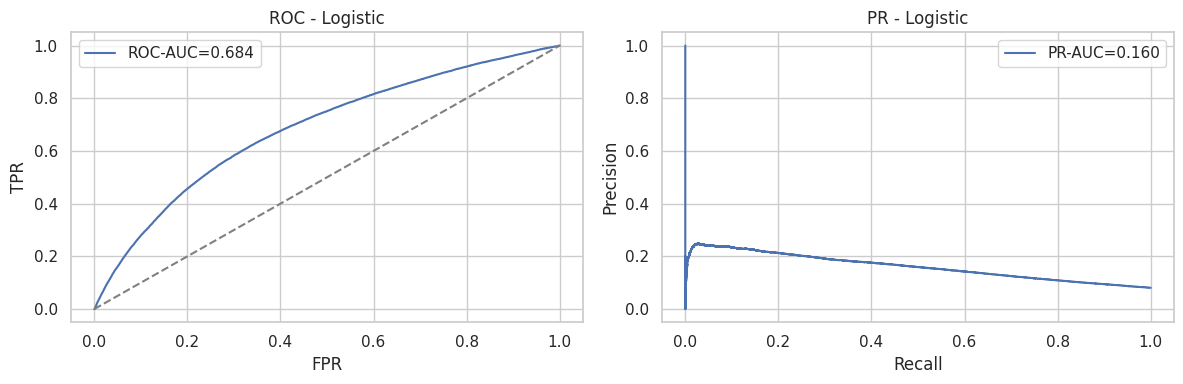

In [57]:
fpr, tpr, _ = roc_curve(y, log_oof)
prec, rec, _ = precision_recall_curve(y, log_oof)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(fpr, tpr, label=f"ROC-AUC={roc_auc_score(y, log_oof):.3f}")
plt.plot([0,1], [0,1], '--', color='gray')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC - Logistic'); plt.legend()

plt.subplot(1,2,2)
plt.plot(rec, prec, label=f"PR-AUC={average_precision_score(y, log_oof):.3f}")
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title('PR - Logistic'); plt.legend()
plt.tight_layout(); plt.show()


###5.6 Modelo con LightGBM

In [58]:
lgbm = LGBMClassifier(
    n_estimators=1200,
    learning_rate=0.03,
    num_leaves=64,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.2,
    min_child_samples=50,
    class_weight='balanced',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

lgb_oof, lgb_metrics, lgb_models = cross_validate_model(
    base_estimator=lgbm,
    X=X, y=y, preprocess=preprocess,
    n_splits=N_SPLITS, random_state=RANDOM_STATE, verbose=True
)

print("\n[LightGBM] M√©tricas OOF:")
for k,v in lgb_metrics.items():
    print(f"  - {k}: {v:.6f}")


[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.374520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 22164
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 287
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 1: ROC-AUC=0.7802 | PR-AUC=0.2687
[LightGBM] [Info] Number of positive: 19860, number of negative: 226149
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.375550 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22243
[LightGBM] [Info] Number of data points in the train set: 246009, number of used features: 287
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 2: ROC-AUC=0.7871 | PR-AUC=0.2785
[LightGBM] [Info] Number of positive: 19860, number of negative: 226149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.366878 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 22147
[LightGBM] [Info] Number of data points in the train set: 246009, number of used features: 287
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 3: ROC-AUC=0.7798 | PR-AUC=0.2663
[LightGBM] [Info] Number of positive: 19860, number of negative: 226149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.348189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 22166
[LightGBM] [Info] Number of data points in the train set: 246009, number of used features: 288
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 4: ROC-AUC=0.7846 | PR-AUC=0.2792
[LightGBM] [Info] Number of positive: 19860, number of negative: 226149
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.118681 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22151
[LightGBM] [Info] Number of data points in the train set: 246009, number of used features: 288
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 5: ROC-AUC=0.7804 | PR-AUC=0.2668

OOF: ROC-AUC=0.7824 | PR-AUC=0.2716 | KS=0.4266
Umbral √≥ptimo (Youden J)‚âà 0.3904 | TPR=0.707 | FPR=0.281

[LightGBM] M√©tricas OOF:
  - roc_auc_oof: 0.782413
  - pr_auc_oof: 0.271625
  - ks_oof: 0.426590
  - thr_opt_youdenJ: 0.390386
  - tpr_opt: 0.707311
  - fpr_opt: 0.280721


###5.7 Verificamos importancia de variables

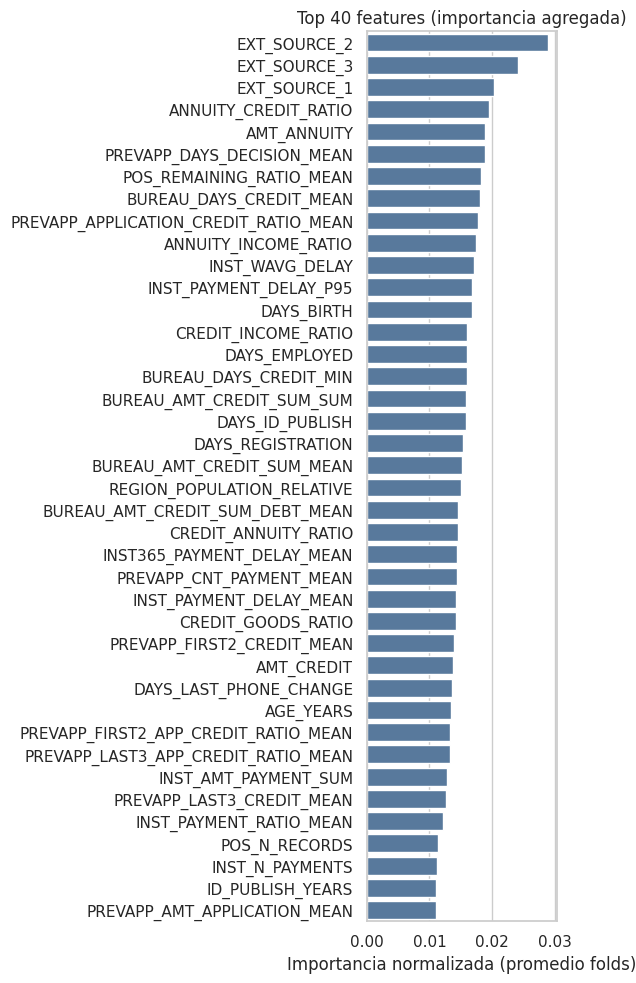

In [59]:
from collections import defaultdict

def get_feature_names(preprocess: ColumnTransformer) -> List[str]:
    """
    Obtiene los nombres de columnas despu√©s del ColumnTransformer.
    Funciona con OneHotEncoder (scikit-learn >= 1.0).
    """
    output_features = []
    for name, trans, cols in preprocess.transformers_:
        if name == 'remainder' and trans == 'drop':
            continue
        if hasattr(trans, 'get_feature_names_out'):
            feats = trans.get_feature_names_out(cols)
        else:
            # Pipeline: tomar del √∫ltimo step con get_feature_names_out
            if hasattr(trans, 'steps'):
                last = trans.steps[-1][1]
                if hasattr(last, 'get_feature_names_out'):
                    feats = last.get_feature_names_out(cols)
                else:
                    feats = cols
            else:
                feats = cols
        output_features.extend(feats)
    return list(output_features)

# Tomamos el primer modelo entrenado para obtener nombres
pre_fitted = lgb_models[0].named_steps['pre']
feat_names = get_feature_names(pre_fitted)

# Sumamos importancias promedio a trav√©s de folds
imp_accum = np.zeros(len(feat_names))
for pipe in lgb_models:
    booster = pipe.named_steps['clf']
    imp = booster.feature_importances_
    # normalizamos por suma para evitar sesgos por n√∫mero de √°rboles
    imp_accum += imp / (imp.sum() + 1e-9)

imp_mean = imp_accum / len(lgb_models)
feat_imp_df = pd.DataFrame({'feature_expanded': feat_names, 'importance': imp_mean})

# Agregamos por variable original (antes de OHE). Para OneHot, el nombre es "ohe__col_val" o "cat__ohe__col_val".
# Simplificamos tomando el prefijo antes del separador para cat, y el nombre exacto para num.
def base_col_name(s):
    # ejemplos de nombres posibles:
    # 'num__AMT_CREDIT' -> AMT_CREDIT
    # 'cat__ohe__NAME_EDUCATION_TYPE_Basic' -> NAME_EDUCATION_TYPE
    # 'cat__ohe__REGION_POP_CAT_(0.01, 0.02]' -> REGION_POP_CAT
    s = str(s)
    if '__' in s:
        parts = s.split('__')
        raw = parts[-1]  # √∫ltimo fragmento
    else:
        raw = s
    return raw.split('_', 1)[0] if ('_' in raw and raw in cat_cols) else raw.split('_')[0]

# Un m√©todo m√°s robusto:
def original_col_from_expanded(s):
    s = str(s)
    # Si viene de num pipeline:
    if s.startswith('num__'):
        return s.replace('num__','')
    # Si viene de cat + ohe:
    if s.startswith('cat__ohe__'):
        base = s.replace('cat__ohe__','')
        return base.split('_', 1)[0]  # toma nombre antes del primer "_"
    return s

feat_imp_df['feature'] = feat_imp_df['feature_expanded'].map(original_col_from_expanded)
imp_by_feature = feat_imp_df.groupby('feature', as_index=False)['importance'].sum()
imp_by_feature = imp_by_feature.sort_values('importance', ascending=False).head(40)

plt.figure(figsize=(6,10))
sns.barplot(data=imp_by_feature, y='feature', x='importance', color='#4C78A8')
plt.title('Top 40 features (importancia agregada)')
plt.xlabel('Importancia normalizada (promedio folds)')
plt.ylabel('')
plt.tight_layout()
plt.show()


###5.8 Comparamos

In [ ]:
comp = pd.DataFrame({
    'modelo': ['Logistic', 'LightGBM'],
    'roc_auc_oof': [log_metrics['roc_auc_oof'], lgb_metrics['roc_auc_oof']],
    'pr_auc_oof':  [log_metrics['pr_auc_oof'],  lgb_metrics['pr_auc_oof']],
    'ks_oof':      [log_metrics['ks_oof'],      lgb_metrics['ks_oof']]
})
comp


modelo  roc_auc_oof  pr_auc_oof    ks_oof
0  Logistic     0.684029    0.159992  0.283627
1  LightGBM     0.782413    0.271625  0.426590

In [ ]:
thr = lgb_metrics['thr_opt_youdenJ']
y_hat = (lgb_oof >= thr).astype(int)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y, y_hat, labels=[0,1])
print("Matriz de confusi√≥n (OOF, LGBM, thr_opt):\n", cm)
print("\nReporte (OOF, LGBM, thr_opt):\n", classification_report(y, y_hat, digits=3))


Matriz de confusi√≥n (OOF, LGBM, thr_opt):
 [[203330  79356]
 [  7266  17559]]

Reporte (OOF, LGBM, thr_opt):
               precision    recall  f1-score   support

           0      0.965     0.719     0.824    282686
           1      0.181     0.707     0.288     24825

    accuracy                          0.718    307511
   macro avg      0.573     0.713     0.556    307511
weighted avg      0.902     0.718     0.781    307511



#***6. Conclusiones***

###**1. Baseline (Logistic Regression)**

- Logr√≥ un ROC-AUC=0.684, PR-AUC=0.160 y KS=0.284.

- Confirma capacidad m√≠nima de discriminaci√≥n, pero insuficiente para un score crediticio robusto.

- Sirve como punto de referencia lineal e interpretable.

###**2. LightGBM (modelo avanzado)**

- Alcanz√≥ ROC-AUC=0.782, PR-AUC=0.272 y KS=0.427.

- Representa una mejora significativa sobre los modelos anteriores.

- Identifica de manera m√°s precisa a los clientes con mayor riesgo de incumplimiento.

- Se convierte en el modelo base recomendado para producci√≥n.

#***7. Recomendaciones***

- Adopci√≥n del modelo LightGBM como candidato principal para scoring crediticio.

- Refuerzo en ingenier√≠a de variables (features avanzados):

- Variables temporales (√∫ltimos 3/6 pagos, recency-weighted).

- Conteos y combinaciones de productos previos rechazados.

- Ratios adicionales (ej. Annuity/Max Installment, Debt/Credit).

- Evaluar calibraci√≥n de probabilidades: para garantizar que las puntuaciones se interpreten correctamente como probabilidades de default.

- Incorporar validaci√≥n avanzada (Stratified + Time-based) para mejorar la robustez y evitar sobreajuste.

- Comparar con otros algoritmos boosting (CatBoost/XGBoost) para enriquecer la diversidad de modelos y potencialmente mejorar la estabilidad del score.